In [1]:
#import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats 
import seaborn as sns; sns.set_theme(color_codes=True)
from scipy.stats.stats import pearsonr
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from statsmodels.stats.contingency_tables import mcnemar

In [2]:
#have a quick glance at the data obtained from the users of the chatbot

df = pd.read_csv('fyp.csv')
df.head()

,objectId,user_education,pre_q1,pre_q2,pre_q3,pre_q4,pre_q5,post_q1,post_q2,post_q3,...,survey_q3a,survey_q3b,survey_q4a,survey_q4b,survey_q5a,survey_q5b,survey_q6,survey_q7a,survey_q7b,survey_q8
0,nR0eH4BXBxqQ7Askn6B7,PECT (community rotation),"a,b","a,b,d",a,"a,b","a,d","a,b,d","a,c,d",a,...,b,"b,c,e,d,a",c,c,c,c,"a,c,g,h,I,f,e,d,b",d,"a,c,d,b",d
1,CUT0EUn0nhZAbFXeh0wP,pre-registration training,"A, D","A, D",a,C,"A, D","A, B, D","A, C, D",a,...,b,"E, C, D, B, A",d,b,d,c,"C, I, F, A, H, G, E, D, B",b,"C, A, D, B",e
2,NzwaGfA323uHOcrx36cT,pre-registration training,"a, b, d","a,c",a,"a, b, d","a, b, c, d","a, b, c, d","a, c, d",a,...,a,"e, d, c, d, a",a,b,a,a,"f, a, i, c, h, e, g, b, d",c,"a, d, c, b",e
3,lUx7IcNBfmGYtJfAJY9F,PECT (community rotation),"a,d","a,c",a,"a,b,d","a,c,d","a,b,c,d","a,b,d",a,...,a,"a,b,e,c,d",c,b,c,c,"i,c,a,f,h,e,g,d,b",d,"c,d,a,b",e
4,mLxmeiMBSAs6RPbKpRge,pre-registration training,"a, b, c, d","a, c",a,"a, b, d","a, c, d","a, b, d","a, b, d",a,...,a,"e, c, b, a, d",e,d,e,b,"g, i, h, a, c, f, b, e, d",b,"a, c, d, b",d


In [3]:
#number of unique users

len(df)

83

In [4]:
#number of unique users grouped by education

df.groupby('user_education').size()

user_education
PECT (community rotation)    26
PECT (industry rotation)     23
pre-registration training    34
dtype: int64

In [5]:
#pre-learning q1 score for all 3 groups

df1 = df.filter(items=['objectId', 'pre_q1'])

df1['pre_q1'] = df1['pre_q1'].str.lower()

df1_split = df1['pre_q1'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie', 'delta']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')
df1_split['delta'] = df1_split['delta'].str.replace(' ', '')

q1_mymap = {'a': 1, 'b': 1, 'c': 0, 'd': 1, 'None': 0}
df1_split = df1_split.applymap(lambda s: q1_mymap.get(s) if s in q1_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['pre_q1_score'] = df1_split.sum(axis=1) / 3
df = pd.concat([df, df1_split['pre_q1_score']], axis=1)

df_q1 = df.filter(items=['user_education', 'pre_q1_score'])
df_q1.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education pre_q1_score                    
                                     mean    median       var
0  PECT (community rotation)     0.564103  0.666667  0.024615
1   PECT (industry rotation)     0.565217  0.666667  0.024594
2  pre-registration training     0.617647  0.666667  0.061497

In [6]:
#pre-learning q2 score for all 3 groups

df1 = df.filter(items=['objectId', 'pre_q2'])

df1['pre_q2'] = df1['pre_q2'].str.lower()

df1_split = df1['pre_q2'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')

q2_mymap = {'a': 1, 'b': 0, 'c': 0, 'd': 1, 'None': 0, 'noneoftheabove': 0}
df1_split = df1_split.applymap(lambda s: q2_mymap.get(s) if s in q2_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['pre_q2_score'] = df1_split.sum(axis=1) / 2
df = pd.concat([df, df1_split['pre_q2_score']], axis=1)

df_pre_q2 = df.filter(items=['user_education', 'pre_q2_score'])
df_pre_q2.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education pre_q2_score                 
                                     mean median       var
0  PECT (community rotation)     0.615385    0.5  0.046154
1   PECT (industry rotation)     0.673913    0.5  0.059289
2  pre-registration training     0.750000    1.0  0.079545

In [7]:
#pre-learning q3 score for all 3 groups

df1 = df.filter(items=['objectId', 'pre_q3'])

df1['pre_q3'] = df1['pre_q3'].str.lower()

df1_split = df1['pre_q3'].str.split(',', expand=True)

df1_split.columns = ['alpha']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')

q3_mymap = {'a': 1, 'b': 0, 'c': 0, 'None': 0}
df1_split = df1_split.applymap(lambda s: q3_mymap.get(s) if s in q3_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['pre_q3_score'] = df1_split.sum(axis=1)
df = pd.concat([df, df1_split['pre_q3_score']], axis=1)

df_pre_q3 = df.filter(items=['user_education', 'pre_q3_score'])
df_pre_q3.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education pre_q3_score                 
                                     mean median       var
0  PECT (community rotation)     0.653846      1  0.235385
1   PECT (industry rotation)     0.608696      1  0.249012
2  pre-registration training     0.911765      1  0.082888

In [8]:
#pre-learning q4 score for all 3 groups

df1 = df.filter(items=['objectId', 'pre_q4'])

df1['pre_q4'] = df1['pre_q4'].str.lower()

df1_split = df1['pre_q4'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')

q4_mymap = {'a': 1, 'b': 1, 'c': 0, 'd': 1, 'None': 0}
df1_split = df1_split.applymap(lambda s: q4_mymap.get(s) if s in q4_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['pre_q4_score'] = df1_split.sum(axis=1) / 3
df = pd.concat([df, df1_split['pre_q4_score']], axis=1)

df_pre_q4 = df.filter(items=['user_education', 'pre_q4_score'])
df_pre_q4.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education pre_q4_score                    
                                     mean    median       var
0  PECT (community rotation)     0.628205  0.666667  0.082906
1   PECT (industry rotation)     0.623188  0.666667  0.083882
2  pre-registration training     0.705882  0.666667  0.085958

In [9]:
#pre-learning q5 score for all 3 groups

df1 = df.filter(items=['objectId', 'pre_q5'])

df1['pre_q5'] = df1['pre_q5'].str.lower()

df1_split = df1['pre_q5'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie', 'delta']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')
df1_split['delta'] = df1_split['delta'].str.replace(' ', '')

q5_mymap = {'a': 1, 'b': 0, 'c': 1, 'd': 1, 'None': 0}
df1_split = df1_split.applymap(lambda s: q5_mymap.get(s) if s in q5_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['pre_q5_score'] = df1_split.sum(axis=1) / 3
df = pd.concat([df, df1_split['pre_q5_score']], axis=1)

df_pre_q5 = df.filter(items=['user_education', 'pre_q5_score'])
df_pre_q5.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education pre_q5_score                    
                                     mean    median       var
0  PECT (community rotation)     0.717949  0.666667  0.050598
1   PECT (industry rotation)     0.666667  0.666667  0.050505
2  pre-registration training     0.803922  0.666667  0.041196

In [10]:
#post-learning q1 score for all 3 groups

df1 = df.filter(items=['objectId', 'post_q1'])

df1['post_q1'] = df1['post_q1'].str.lower()

df1_split = df1['post_q1'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie', 'delta']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')
df1_split['delta'] = df1_split['delta'].str.replace(' ', '')

post_q1_mymap = {'a': 1, 'b': 1, 'c': 0, 'd': 1, 'None': 0}
df1_split = df1_split.applymap(lambda s: post_q1_mymap.get(s) if s in post_q1_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['post_q1_score'] = df1_split.sum(axis=1) / 3
df = pd.concat([df, df1_split['post_q1_score']], axis=1)

df_post_q1 = df.filter(items=['user_education', 'post_q1_score'])
df_post_q1.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education post_q1_score                    
                                      mean    median       var
0  PECT (community rotation)      0.794872  0.666667  0.045128
1   PECT (industry rotation)      0.782609  0.666667  0.046552
2  pre-registration training      0.823529  1.000000  0.041989

In [11]:
#post-learning q1 score for all 3 groups

df1 = df.filter(items=['objectId', 'post_q2'])

df1['post_q2'] = df1['post_q2'].str.lower()

df1_split = df1['post_q2'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')

post_q2_mymap = {'a': 1, 'b': 0, 'c': 1, 'd': 1, 'None': 0}
df1_split = df1_split.applymap(lambda s: post_q2_mymap.get(s) if s in post_q2_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['post_q2_score'] = df1_split.sum(axis=1) / 3
df = pd.concat([df, df1_split['post_q2_score']], axis=1)

df_post_q2 = df.filter(items=['user_education', 'post_q2_score'])
df_post_q2.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education post_q2_score                    
                                      mean    median       var
0  PECT (community rotation)      0.807692  0.666667  0.037094
1   PECT (industry rotation)      0.782609  0.666667  0.026350
2  pre-registration training      0.813725  0.833333  0.041691

In [12]:
#post-learning q2 score for all 3 groups

df1 = df.filter(items=['objectId', 'post_q3'])

df1['post_q3'] = df1['post_q3'].str.lower()

df1_split = df1['post_q3'].str.split(',', expand=True)

df1_split.columns = ['alpha']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')

post_q3_mymap = {'a': 1, 'b': 0, 'c': 0, 'None': 0}
df1_split = df1_split.applymap(lambda s: post_q3_mymap.get(s) if s in post_q3_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['post_q3_score'] = df1_split.sum(axis=1)
df = pd.concat([df, df1_split['post_q3_score']], axis=1)

df_post_q3 = df.filter(items=['user_education', 'post_q3_score'])
df_post_q3.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education post_q3_score                 
                                      mean median       var
0  PECT (community rotation)      0.807692      1  0.161538
1   PECT (industry rotation)      0.826087      1  0.150198
2  pre-registration training      0.970588      1  0.029412

In [13]:
#post-learning q4 score for all 3 groups
 
df1 = df.filter(items=['objectId', 'post_q4'])

df1['post_q4'] = df1['post_q4'].str.lower()

df1_split = df1['post_q4'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')

post_q4_mymap = {'a': 0, 'b': 0, 'c': 1, 'd': 1, 'None': 0}
df1_split = df1_split.applymap(lambda s: post_q4_mymap.get(s) if s in post_q4_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['post_q4_score'] = df1_split.sum(axis=1) / 2
df = pd.concat([df, df1_split['post_q4_score']], axis=1)

df_post_q4 = df.filter(items=['user_education', 'post_q4_score'])
df_post_q4.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education post_q4_score                 
                                      mean median       var
0  PECT (community rotation)      0.826923    1.0  0.078846
1   PECT (industry rotation)      0.826087    1.0  0.059289
2  pre-registration training      0.838235    1.0  0.056373

In [14]:
#post-learning q5 score for all 3 groups

df1 = df.filter(items=['objectId', 'post_q5'])

df1['post_q5'] = df1['post_q5'].str.lower()

df1_split = df1['post_q5'].str.split(',', expand=True)

df1_split.columns = ['alpha', 'beta', 'charlie']
df1_split['alpha'] = df1_split['alpha'].str.replace(' ', '')
df1_split['beta'] = df1_split['beta'].str.replace(' ', '')
df1_split['charlie'] = df1_split['charlie'].str.replace(' ', '')

post_q5_mymap = {'a': 1, 'b': 0, 'c': 1, 'd': 0, 'e': 1, 'None': 0}
df1_split = df1_split.applymap(lambda s: post_q5_mymap.get(s) if s in post_q5_mymap else s)
df1_split = df1_split.fillna(0)

df1_split['post_q5_score'] = df1_split.sum(axis=1) / 3
df = pd.concat([df, df1_split['post_q5_score']], axis=1)

df_post_q5 = df.filter(items=['user_education', 'post_q5_score'])
df_post_q5.groupby('user_education').agg(["mean", "median", "var"]).reset_index()

user_education post_q5_score                    
                                      mean    median       var
0  PECT (community rotation)      0.820513  0.666667  0.028718
1   PECT (industry rotation)      0.840580  1.000000  0.028986
2  pre-registration training      0.901961  1.000000  0.023767

survey_q1,After some time,Almost instantly,Still learning how to use it
user_education,,,
PECT (community rotation),8,16,2
PECT (industry rotation),8,12,3
pre-registration training,11,22,1


survey_q1,After some time,Almost instantly,Still learning how to use it
user_education,,,
PECT (community rotation),30.769231,61.538462,7.692308
PECT (industry rotation),34.782609,52.173913,13.043478
pre-registration training,32.352941,64.705882,2.941176


<AxesSubplot:xlabel='user_education'>

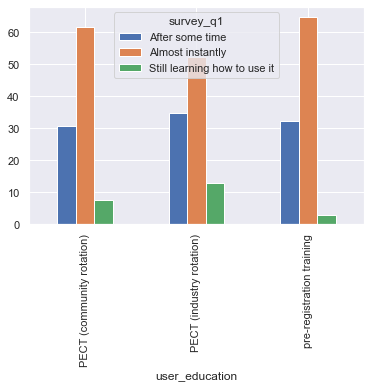

In [15]:
#survey q1: How quickly were you able to learn to use this chatbot?

#in number of users

df2 = df.filter(items=['objectId', 'user_education', 'survey_q1'])
survey_q1_mymap = {'a': 'Almost instantly', 'b': 'After some time', 'c': 'Still learning how to use it'}
df2 = df2.applymap(lambda s: survey_q1_mymap.get(s) if s in survey_q1_mymap else s)
df2 = df2.groupby(['user_education','survey_q1']).size().unstack(level=1)
df2

#in percentage of users for each group

cols = list(df2)
df2[cols] = df2[cols].div(df2[cols].sum(axis=1), axis=0).multiply(100)
df2

#in percentage of users for each group (graph)

df2.plot(kind = 'bar')

survey_q2,Difficult,Easy,Neutral,Very easy
user_education,,,,
PECT (community rotation),2.0,8.0,3.0,13.0
PECT (industry rotation),2.0,9.0,1.0,11.0
pre-registration training,0.0,11.0,0.0,23.0


survey_q2,Difficult,Easy,Neutral,Very easy
user_education,,,,
PECT (community rotation),7.692308,30.769231,11.538462,50.000000
PECT (industry rotation),8.695652,39.130435,4.347826,47.826087
pre-registration training,0.000000,32.352941,0.000000,67.647059


<AxesSubplot:xlabel='user_education'>

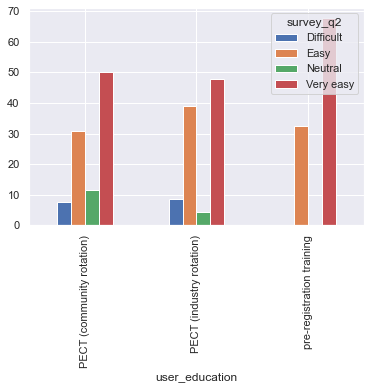

In [16]:
#survey q2: How easy was it to use the chatbot?

#in number of users

df3 = df.filter(items=['objectId', 'user_education', 'survey_q2'])
survey_q2_mymap = {'a': 'Very easy', 'b': 'Easy', 'c': 'Neutral', 'd': 'Difficult', 'e': 'Very difficult'}
df3 = df3.applymap(lambda s: survey_q2_mymap.get(s) if s in survey_q2_mymap else s)
df3 = df3.groupby(['user_education','survey_q2']).size().unstack(level=1)
df3 = df3.fillna(0)
df3

#in percentage of users for each group

cols = list(df3)
df3[cols] = df3[cols].div(df3[cols].sum(axis=1), axis=0).multiply(100)
df3

#in percentage of users for each group (graph)

df3.plot(kind = 'bar')

survey_q3a,Agree,Disagree,Neutral,Strongly agree
user_education,,,,
PECT (community rotation),17.0,1.0,5.0,3.0
PECT (industry rotation),11.0,0.0,7.0,5.0
pre-registration training,22.0,3.0,3.0,6.0


survey_q3a,Agree,Disagree,Neutral,Strongly agree
user_education,,,,
PECT (community rotation),65.384615,3.846154,19.230769,11.538462
PECT (industry rotation),47.826087,0.000000,30.434783,21.739130
pre-registration training,64.705882,8.823529,8.823529,17.647059


<AxesSubplot:xlabel='user_education'>

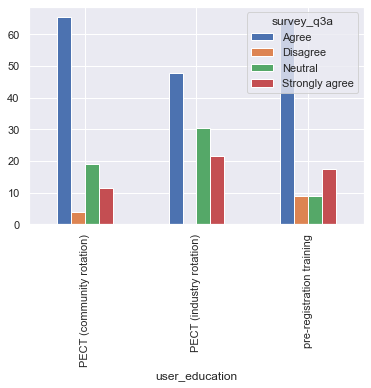

In [17]:
#survey q3a: The chatbot provides me with a personalized learning experience.

#in number of users

df4 = df.filter(items=['objectId', 'user_education', 'survey_q3a'])
survey_q3a_mymap = {'a': 'Strongly agree', 'b': 'Agree', 'c': 'Neutral', 'd': 'Disagree', 'e': 'Strongly disagree'}
df4 = df4.applymap(lambda s: survey_q3a_mymap.get(s) if s in survey_q3a_mymap else s)
df4 = df4.groupby(['user_education','survey_q3a']).size().unstack(level=1)
df4 = df4.fillna(0)
df4

#in percentage of users for each group

cols = list(df4)
df4[cols] = df4[cols].div(df4[cols].sum(axis=1), axis=0).multiply(100)
df4

#in percentage of users for each group (graph)

df4.plot(kind = 'bar')

In [18]:
#survey q3b: Rank the chatbot features from most relevant to least relevant in providing a personalized learning experience.

df5 = df.filter(items=['objectId', 'user_education', 'survey_q3b'])

df5['survey_q3b'] = df5['survey_q3b'].str.lower()

df5_split = df5['survey_q3b'].str.split(',', expand=True)

df5_split.columns = ['first', 'second', 'third', 'fourth', 'fifth']
df5_split['first'] = df5_split['first'].str.replace(' ', '')
df5_split['second'] = df5_split['second'].str.replace(' ', '')
df5_split['third'] = df5_split['third'].str.replace(' ', '')
df5_split['fourth'] = df5_split['fourth'].str.replace(' ', '')
df5_split['fifth'] = df5_split['fifth'].str.replace(' ', '')

df5 = pd.concat([df5['user_education'], df5_split], axis=1)

#for the PECT (community rotation) group

df5_pect_comm = df5[df5['user_education'] == "PECT (community rotation)"]

df5_pect_comm_first = pd.DataFrame(df5_pect_comm['first'].value_counts())
df5_pect_comm_first.reset_index(level=0, inplace=True)

df5_pect_comm_second = pd.DataFrame(df5_pect_comm['second'].value_counts())
df5_pect_comm_second.reset_index(level=0, inplace=True)

df5_pect_comm_third = pd.DataFrame(df5_pect_comm['third'].value_counts())
df5_pect_comm_third.reset_index(level=0, inplace=True)

df5_pect_comm_fourth = pd.DataFrame(df5_pect_comm['fourth'].value_counts())
df5_pect_comm_fourth.reset_index(level=0, inplace=True)

df5_pect_comm_fifth = pd.DataFrame(df5_pect_comm['fifth'].value_counts())
df5_pect_comm_fifth.reset_index(level=0, inplace=True)

data_frames = [df5_pect_comm_first, df5_pect_comm_second, df5_pect_comm_third, df5_pect_comm_fourth, df5_pect_comm_fifth]
df5_pect_comm = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df5_pect_comm['total_count'] = df5_pect_comm.iloc[:,1:6].sum(axis=1)
df5_pect_comm['weighted_avg_rank'] = ((df5_pect_comm['first'] * 1) +  (df5_pect_comm['second'] * 2) + (df5_pect_comm['third'] * 3) + (df5_pect_comm['fourth'] * 4) + (df5_pect_comm['fifth'] * 5)) / df5_pect_comm['total_count']
survey_q3b_mymap = {'a': 'Addressing you by name', 'b': 'Navigating through the educational modules at your own time', 'c': 'Tracking your progress in the educational modules', 'd': 'Choosing your preferred virtual patient to apply your knowledge', 'e': 'Providing feedback on your virtual patient assessment'}
df5_pect_comm = df5_pect_comm.applymap(lambda s: survey_q3b_mymap.get(s) if s in survey_q3b_mymap else s)
df5_pect_comm

#for the PECT (industry rotation) group

df5_pect_ind = df5[df5['user_education'] == "PECT (industry rotation)"]

df5_pect_ind_first = pd.DataFrame(df5_pect_ind['first'].value_counts())
df5_pect_ind_first.reset_index(level=0, inplace=True)

df5_pect_ind_second = pd.DataFrame(df5_pect_ind['second'].value_counts())
df5_pect_ind_second.reset_index(level=0, inplace=True)

df5_pect_ind_third = pd.DataFrame(df5_pect_ind['third'].value_counts())
df5_pect_ind_third.reset_index(level=0, inplace=True)

df5_pect_ind_fourth = pd.DataFrame(df5_pect_ind['fourth'].value_counts())
df5_pect_ind_fourth.reset_index(level=0, inplace=True)

df5_pect_ind_fifth = pd.DataFrame(df5_pect_ind['fifth'].value_counts())
df5_pect_ind_fifth.reset_index(level=0, inplace=True)

data_frames = [df5_pect_ind_first, df5_pect_ind_second, df5_pect_ind_third, df5_pect_ind_fourth, df5_pect_ind_fifth]
df5_pect_ind = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df5_pect_ind['total_count'] = df5_pect_ind.iloc[:,1:6].sum(axis=1)
df5_pect_ind['weighted_avg_rank'] = ((df5_pect_ind['first'] * 1) +  (df5_pect_ind['second'] * 2) + (df5_pect_ind['third'] * 3) + (df5_pect_ind['fourth'] * 4) + (df5_pect_ind['fifth'] * 5)) / df5_pect_ind['total_count']
survey_q3b_mymap = {'a': 'Addressing you by name', 'b': 'Navigating through the educational modules at your own time', 'c': 'Tracking your progress in the educational modules', 'd': 'Choosing your preferred virtual patient to apply your knowledge', 'e': 'Providing feedback on your virtual patient assessment'}
df5_pect_ind = df5_pect_ind.applymap(lambda s: survey_q3b_mymap.get(s) if s in survey_q3b_mymap else s)
df5_pect_ind

#for the pre-registration training group

df5_prereg = df5[df5['user_education'] == "pre-registration training"]

df5_prereg_first = pd.DataFrame(df5_prereg['first'].value_counts())
df5_prereg_first.reset_index(level=0, inplace=True)

df5_prereg_second = pd.DataFrame(df5_prereg['second'].value_counts())
df5_prereg_second.reset_index(level=0, inplace=True)

df5_prereg_third = pd.DataFrame(df5_prereg['third'].value_counts())
df5_prereg_third.reset_index(level=0, inplace=True)

df5_prereg_fourth = pd.DataFrame(df5_prereg['fourth'].value_counts())
df5_prereg_fourth.reset_index(level=0, inplace=True)

df5_prereg_fifth = pd.DataFrame(df5_prereg['fifth'].value_counts())
df5_prereg_fifth.reset_index(level=0, inplace=True)

data_frames = [df5_prereg_first, df5_prereg_second, df5_prereg_third, df5_prereg_fourth, df5_prereg_fifth]
df5_prereg = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df5_prereg['total_count'] = df5_prereg.iloc[:,1:6].sum(axis=1)
df5_prereg['weighted_avg_rank'] = ((df5_prereg['first'] * 1) +  (df5_prereg['second'] * 2) + (df5_prereg['third'] * 3) + (df5_prereg['fourth'] * 4) + (df5_prereg['fifth'] * 5)) / df5_prereg['total_count']
survey_q3b_mymap = {'a': 'Addressing you by name', 'b': 'Navigating through the educational modules at your own time', 'c': 'Tracking your progress in the educational modules', 'd': 'Choosing your preferred virtual patient to apply your knowledge', 'e': 'Providing feedback on your virtual patient assessment'}
df5_prereg = df5_prereg.applymap(lambda s: survey_q3b_mymap.get(s) if s in survey_q3b_mymap else s)
df5_prereg

,index,first,second,third,fourth,fifth,total_count,weighted_avg_rank
0,Navigating through the educational modules at ...,10.0,5.0,7,4,0.0,26.0,2.192308
1,Providing feedback on your virtual patient ass...,10.0,4.0,7,5,0.0,26.0,2.269231
2,Tracking your progress in the educational modules,5.0,16.0,4,1,0.0,26.0,2.038462
3,Addressing you by name,1.0,0.0,2,9,14.0,26.0,4.346154
4,Choosing your preferred virtual patient to app...,0.0,1.0,6,7,12.0,26.0,4.153846


,index,first,second,third,fourth,fifth,total_count,weighted_avg_rank
0,Navigating through the educational modules at ...,8.0,8.0,4,3,0.0,23.0,2.086957
1,Providing feedback on your virtual patient ass...,6.0,7.0,8,1,1.0,23.0,2.304348
2,Tracking your progress in the educational modules,5.0,7.0,4,7,0.0,23.0,2.565217
3,Addressing you by name,4.0,1.0,2,3,13.0,23.0,3.869565
4,Choosing your preferred virtual patient to app...,0.0,0.0,5,9,9.0,23.0,4.173913


,index,first,second,third,fourth,fifth,total_count,weighted_avg_rank
0,Providing feedback on your virtual patient ass...,13.0,4.0,10,5,2.0,34.0,2.382353
1,Navigating through the educational modules at ...,11.0,10.0,6,6,0.0,33.0,2.212121
2,Tracking your progress in the educational modules,8.0,18.0,6,2,0.0,34.0,2.058824
3,Addressing you by name,2.0,0.0,4,13,15.0,34.0,4.147059
4,Choosing your preferred virtual patient to app...,0.0,2.0,8,8,17.0,35.0,4.142857


survey_q4a,Excellent,Fair,Good,Poor,Very good
user_education,,,,,
PECT (community rotation),3.0,4.0,8.0,4.0,7.0
PECT (industry rotation),0.0,8.0,8.0,4.0,3.0
pre-registration training,3.0,11.0,4.0,4.0,12.0


survey_q4a,Excellent,Fair,Good,Poor,Very good
user_education,,,,,
PECT (community rotation),11.538462,15.384615,30.769231,15.384615,26.923077
PECT (industry rotation),0.000000,34.782609,34.782609,17.391304,13.043478
pre-registration training,8.823529,32.352941,11.764706,11.764706,35.294118


<AxesSubplot:xlabel='user_education'>

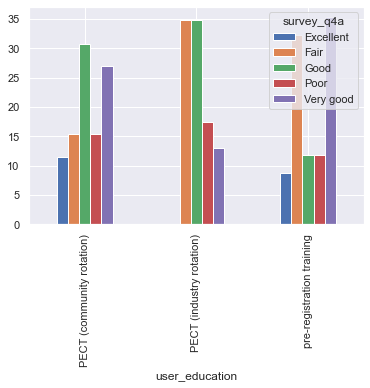

In [19]:
#survey q4a: What best describes your level of knowledge on identifying the factors affecting long-term BPV
#BEFORE using the chatbot?

#in number of users

df6 = df.filter(items=['objectId', 'user_education', 'survey_q4a'])
survey_q4a_mymap = {'a': 'Excellent', 'b': 'Very good', 'c': 'Good', 'd': 'Fair', 'e': 'Poor'}
df6 = df6.applymap(lambda s: survey_q4a_mymap.get(s) if s in survey_q4a_mymap else s)
df6 = df6.groupby(['user_education','survey_q4a']).size().unstack(level=1)
df6 = df6.fillna(0)
df6

#in percentage of users for each group

cols = list(df6)
df6[cols] = df6[cols].div(df6[cols].sum(axis=1), axis=0).multiply(100)
df6

#in percentage of users for each group (graph)

df6.plot(kind = 'bar')

survey_q4b,Excellent,Fair,Good,Very good
user_education,,,,
PECT (community rotation),8.0,0.0,5.0,13.0
PECT (industry rotation),9.0,0.0,3.0,11.0
pre-registration training,8.0,2.0,5.0,19.0


survey_q4b,Excellent,Fair,Good,Very good
user_education,,,,
PECT (community rotation),30.769231,0.000000,19.230769,50.000000
PECT (industry rotation),39.130435,0.000000,13.043478,47.826087
pre-registration training,23.529412,5.882353,14.705882,55.882353


<AxesSubplot:xlabel='user_education'>

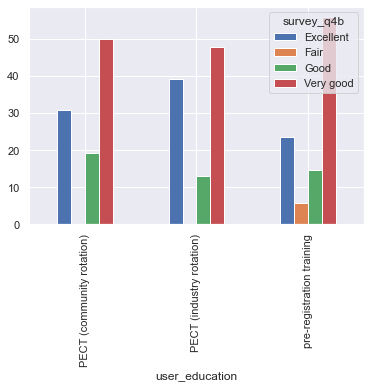

In [20]:
#survey q4b: What best describes your level of knowledge on identifying the factors affecting long-term BPV,
#AFTER using the chatbot?

#in number of users

df7 = df.filter(items=['objectId', 'user_education', 'survey_q4b'])
survey_q4b_mymap = {'a': 'Excellent', 'b': 'Very good', 'c': 'Good', 'd': 'Fair', 'e': 'Poor'}
df7 = df7.applymap(lambda s: survey_q4b_mymap.get(s) if s in survey_q4b_mymap else s)
df7 = df7.groupby(['user_education','survey_q4b']).size().unstack(level=1)
df7 = df7.fillna(0)
df7

#in percentage of users for each group

cols = list(df7)
df7[cols] = df7[cols].div(df7[cols].sum(axis=1), axis=0).multiply(100)
df7

#in percentage of users for each group (graph)

df7.plot(kind = 'bar')

survey_q5a,Excellent,Fair,Good,Poor,Very good
user_education,,,,,
PECT (community rotation),2.0,3.0,10.0,4.0,7.0
PECT (industry rotation),0.0,5.0,10.0,6.0,2.0
pre-registration training,3.0,7.0,10.0,6.0,8.0


survey_q5a,Excellent,Fair,Good,Poor,Very good
user_education,,,,,
PECT (community rotation),7.692308,11.538462,38.461538,15.384615,26.923077
PECT (industry rotation),0.000000,21.739130,43.478261,26.086957,8.695652
pre-registration training,8.823529,20.588235,29.411765,17.647059,23.529412


<AxesSubplot:xlabel='user_education'>

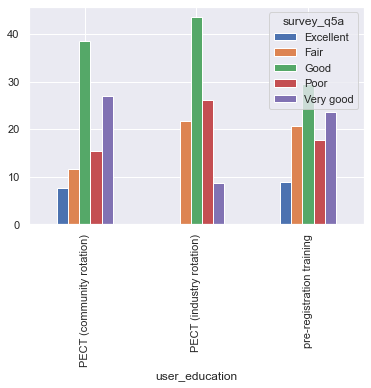

In [21]:
#survey q5a: What best describes your level of knowledge on managing the factors affecting long-term BPV, 
#BEFORE using the chatbot?

#in number of users

df8 = df.filter(items=['objectId', 'user_education', 'survey_q5a'])
survey_q5a_mymap = {'a': 'Excellent', 'b': 'Very good', 'c': 'Good', 'd': 'Fair', 'e': 'Poor'}
df8 = df8.applymap(lambda s: survey_q5a_mymap.get(s) if s in survey_q5a_mymap else s)
df8 = df8.groupby(['user_education','survey_q5a']).size().unstack(level=1)
df8 = df8.fillna(0)
df8

#in percentage of users for each group

cols = list(df8)
df8[cols] = df8[cols].div(df8[cols].sum(axis=1), axis=0).multiply(100)
df8

#in percentage of users for each group (graph)

df8.plot(kind = 'bar')

survey_q5b,Excellent,Good,Very good
user_education,,,
PECT (community rotation),7,4,15
PECT (industry rotation),11,2,10
pre-registration training,10,6,18


survey_q5b,Excellent,Good,Very good
user_education,,,
PECT (community rotation),26.923077,15.384615,57.692308
PECT (industry rotation),47.826087,8.695652,43.478261
pre-registration training,29.411765,17.647059,52.941176


<AxesSubplot:xlabel='user_education'>

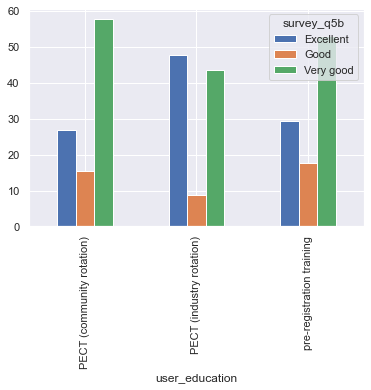

In [22]:
#survey q5b: What best describes your level of knowledge on managing the factors affecting long-term BPV, 
#AFTER using the chatbot?

#in number of users

df9 = df.filter(items=['objectId', 'user_education', 'survey_q5b'])
survey_q5b_mymap = {'a': 'Excellent', 'b': 'Very good', 'c': 'Good', 'd': 'Fair', 'e': 'Poor'}
df9 = df9.applymap(lambda s: survey_q5b_mymap.get(s) if s in survey_q5b_mymap else s)
df9 = df9.groupby(['user_education','survey_q5b']).size().unstack(level=1)
df9 = df9.fillna(0)
df9

#in percentage of users for each group

cols = list(df9)
df9[cols] = df9[cols].div(df9[cols].sum(axis=1), axis=0).multiply(100)
df9

#in percentage of users for each group (graph)

df9.plot(kind = 'bar')

In [23]:
#survey q6: Rank the chatbot features from most liked to most disliked.

df10 = df.filter(items=['objectId', 'user_education', 'survey_q6'])

df10['survey_q6'] = df10['survey_q6'].str.lower()

df10_split = df10['survey_q6'].str.split(',', expand=True)

df10_split.columns = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eighth', 'ninth']
df10_split['first'] = df10_split['first'].str.replace(' ', '')
df10_split['second'] = df10_split['second'].str.replace(' ', '')
df10_split['third'] = df10_split['third'].str.replace(' ', '')
df10_split['fourth'] = df10_split['fourth'].str.replace(' ', '')
df10_split['fifth'] = df10_split['fifth'].str.replace(' ', '')
df10_split['sixth'] = df10_split['sixth'].str.replace(' ', '')
df10_split['seventh'] = df10_split['seventh'].str.replace(' ', '')
df10_split['eighth'] = df10_split['eighth'].str.replace(' ', '')
df10_split['ninth'] = df10_split['ninth'].str.replace(' ', '')

df10 = pd.concat([df10['user_education'], df10_split], axis=1)

#for the PECT (community rotation) group

df10_pect_comm = df10[df10['user_education'] == "PECT (community rotation)"]

df10_pect_comm_first = pd.DataFrame(df10_pect_comm['first'].value_counts())
df10_pect_comm_first.reset_index(level=0, inplace=True)

df10_pect_comm_second = pd.DataFrame(df10_pect_comm['second'].value_counts())
df10_pect_comm_second.reset_index(level=0, inplace=True)

df10_pect_comm_third = pd.DataFrame(df10_pect_comm['third'].value_counts())
df10_pect_comm_third.reset_index(level=0, inplace=True)

df10_pect_comm_fourth = pd.DataFrame(df10_pect_comm['fourth'].value_counts())
df10_pect_comm_fourth.reset_index(level=0, inplace=True)

df10_pect_comm_fifth = pd.DataFrame(df10_pect_comm['fifth'].value_counts())
df10_pect_comm_fifth.reset_index(level=0, inplace=True)

df10_pect_comm_sixth = pd.DataFrame(df10_pect_comm['sixth'].value_counts())
df10_pect_comm_sixth.reset_index(level=0, inplace=True)

df10_pect_comm_seventh = pd.DataFrame(df10_pect_comm['seventh'].value_counts())
df10_pect_comm_seventh.reset_index(level=0, inplace=True)

df10_pect_comm_eighth = pd.DataFrame(df10_pect_comm['eighth'].value_counts())
df10_pect_comm_eighth.reset_index(level=0, inplace=True)

df10_pect_comm_ninth = pd.DataFrame(df10_pect_comm['ninth'].value_counts())
df10_pect_comm_ninth.reset_index(level=0, inplace=True)

data_frames = [df10_pect_comm_first, df10_pect_comm_second, df10_pect_comm_third, df10_pect_comm_fourth, df10_pect_comm_fifth, df10_pect_comm_sixth, df10_pect_comm_seventh, df10_pect_comm_eighth, df10_pect_comm_ninth]
df10_pect_comm = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df10_pect_comm['total_count'] = df10_pect_comm.iloc[:,1:10].sum(axis=1)
df10_pect_comm['weighted_avg_rank'] = ((df10_pect_comm['first'] * 1) +  (df10_pect_comm['second'] * 2) + (df10_pect_comm['third'] * 3) + (df10_pect_comm['fourth'] * 4) + (df10_pect_comm['fifth'] * 5) + (df10_pect_comm['sixth'] * 6) + (df10_pect_comm['seventh'] * 7) + (df10_pect_comm['eighth'] * 8) + (df10_pect_comm['ninth'] * 9)) / df10_pect_comm['total_count']
survey_q6_mymap = {'a': 'Accessing via messaging app', 'b': 'Having a persona for the chatbot', 'c': 'Navigating by buttons only', 'd': 'Having a “Help” section', 'e': 'Having a “Fact of the day” section', 'f': 'Having well-segregated educational modules', 'g': 'Providing links to content resources', 'h': 'Having virtual patient assessment', 'i': 'Providing feedback on your virtual patient assessment'}
df10_pect_comm = df10_pect_comm.applymap(lambda s: survey_q6_mymap.get(s) if s in survey_q6_mymap else s)
df10_pect_comm

#for the PECT (industry rotation) group

df10_pect_ind = df10[df10['user_education'] == "PECT (industry rotation)"]

df10_pect_ind_first = pd.DataFrame(df10_pect_ind['first'].value_counts())
df10_pect_ind_first.reset_index(level=0, inplace=True)

df10_pect_ind_second = pd.DataFrame(df10_pect_ind['second'].value_counts())
df10_pect_ind_second.reset_index(level=0, inplace=True)

df10_pect_ind_third = pd.DataFrame(df10_pect_ind['third'].value_counts())
df10_pect_ind_third.reset_index(level=0, inplace=True)

df10_pect_ind_fourth = pd.DataFrame(df10_pect_ind['fourth'].value_counts())
df10_pect_ind_fourth.reset_index(level=0, inplace=True)

df10_pect_ind_fifth = pd.DataFrame(df10_pect_ind['fifth'].value_counts())
df10_pect_ind_fifth.reset_index(level=0, inplace=True)

df10_pect_ind_sixth = pd.DataFrame(df10_pect_ind['sixth'].value_counts())
df10_pect_ind_sixth.reset_index(level=0, inplace=True)

df10_pect_ind_seventh = pd.DataFrame(df10_pect_ind['seventh'].value_counts())
df10_pect_ind_seventh.reset_index(level=0, inplace=True)

df10_pect_ind_eighth = pd.DataFrame(df10_pect_ind['eighth'].value_counts())
df10_pect_ind_eighth.reset_index(level=0, inplace=True)

df10_pect_ind_ninth = pd.DataFrame(df10_pect_ind['ninth'].value_counts())
df10_pect_ind_ninth.reset_index(level=0, inplace=True)

data_frames = [df10_pect_ind_first, df10_pect_ind_second, df10_pect_ind_third, df10_pect_ind_fourth, df10_pect_ind_fifth, df10_pect_ind_sixth, df10_pect_ind_seventh, df10_pect_ind_eighth, df10_pect_ind_ninth]
df10_pect_ind = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df10_pect_ind['total_count'] = df10_pect_ind.iloc[:,1:10].sum(axis=1)
df10_pect_ind['weighted_avg_rank'] = ((df10_pect_ind['first'] * 1) +  (df10_pect_ind['second'] * 2) + (df10_pect_ind['third'] * 3) + (df10_pect_ind['fourth'] * 4) + (df10_pect_ind['fifth'] * 5) + (df10_pect_ind['sixth'] * 6) + (df10_pect_ind['seventh'] * 7) + (df10_pect_ind['eighth'] * 8) + (df10_pect_ind['ninth'] * 9)) / df10_pect_ind['total_count']
survey_q6_mymap = {'a': 'Accessing via messaging app', 'b': 'Having a persona for the chatbot', 'c': 'Navigating by buttons only', 'd': 'Having a “Help” section', 'e': 'Having a “Fact of the day” section', 'f': 'Having well-segregated educational modules', 'g': 'Providing links to content resources', 'h': 'Having virtual patient assessment', 'i': 'Providing feedback on your virtual patient assessment'}
df10_pect_ind = df10_pect_ind.applymap(lambda s: survey_q6_mymap.get(s) if s in survey_q6_mymap else s)
df10_pect_ind

#for the pre-registration training group

df10_prereg = df10[df10['user_education'] == "pre-registration training"]

df10_prereg_first = pd.DataFrame(df10_prereg['first'].value_counts())
df10_prereg_first.reset_index(level=0, inplace=True)

df10_prereg_second = pd.DataFrame(df10_prereg['second'].value_counts())
df10_prereg_second.reset_index(level=0, inplace=True)

df10_prereg_third = pd.DataFrame(df10_prereg['third'].value_counts())
df10_prereg_third.reset_index(level=0, inplace=True)

df10_prereg_fourth = pd.DataFrame(df10_prereg['fourth'].value_counts())
df10_prereg_fourth.reset_index(level=0, inplace=True)

df10_prereg_fifth = pd.DataFrame(df10_prereg['fifth'].value_counts())
df10_prereg_fifth.reset_index(level=0, inplace=True)

df10_prereg_sixth = pd.DataFrame(df10_prereg['sixth'].value_counts())
df10_prereg_sixth.reset_index(level=0, inplace=True)

df10_prereg_seventh = pd.DataFrame(df10_prereg['seventh'].value_counts())
df10_prereg_seventh.reset_index(level=0, inplace=True)

df10_prereg_eighth = pd.DataFrame(df10_prereg['eighth'].value_counts())
df10_prereg_eighth.reset_index(level=0, inplace=True)

df10_prereg_ninth = pd.DataFrame(df10_prereg['ninth'].value_counts())
df10_prereg_ninth.reset_index(level=0, inplace=True)

data_frames = [df10_prereg_first, df10_prereg_second, df10_prereg_third, df10_prereg_fourth, df10_prereg_fifth, df10_prereg_sixth, df10_prereg_seventh, df10_prereg_eighth, df10_prereg_ninth]
df10_prereg = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df10_prereg['total_count'] = df10_prereg.iloc[:,1:10].sum(axis=1)
df10_prereg['weighted_avg_rank'] = ((df10_prereg['first'] * 1) +  (df10_prereg['second'] * 2) + (df10_prereg['third'] * 3) + (df10_prereg['fourth'] * 4) + (df10_prereg['fifth'] * 5) + (df10_prereg['sixth'] * 6) + (df10_prereg['seventh'] * 7) + (df10_prereg['eighth'] * 8) + (df10_prereg['ninth'] * 9)) / df10_prereg['total_count']
survey_q6_mymap = {'a': 'Accessing via messaging app', 'b': 'Having a persona for the chatbot', 'c': 'Navigating by buttons only', 'd': 'Having a “Help” section', 'e': 'Having a “Fact of the day” section', 'f': 'Having well-segregated educational modules', 'g': 'Providing links to content resources', 'h': 'Having virtual patient assessment', 'i': 'Providing feedback on your virtual patient assessment'}
df10_prereg = df10_prereg.applymap(lambda s: survey_q6_mymap.get(s) if s in survey_q6_mymap else s)
df10_prereg

,index,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,total_count,weighted_avg_rank
0,Having virtual patient assessment,7.0,5.0,6.0,3.0,3.0,0.0,0.0,2.0,0.0,26.0,3.000000
1,Navigating by buttons only,6.0,3.0,4.0,8.0,4.0,1.0,0.0,0.0,0.0,26.0,3.153846
2,Providing links to content resources,4.0,5.0,7.0,2.0,1.0,0.0,6.0,1.0,0.0,26.0,3.769231
3,Accessing via messaging app,4.0,8.0,6.0,4.0,4.0,0.0,0.0,0.0,0.0,26.0,2.846154
4,Having well-segregated educational modules,4.0,2.0,0.0,1.0,12.0,5.0,0.0,0.0,2.0,26.0,4.615385
5,Providing feedback on your virtual patient ass...,1.0,3.0,3.0,6.0,1.0,8.0,4.0,0.0,0.0,26.0,4.653846
6,Having a “Fact of the day” section,0.0,0.0,0.0,2.0,1.0,11.0,8.0,2.0,2.0,26.0,6.500000
7,Having a persona for the chatbot,0.0,0.0,0.0,0.0,0.0,1.0,2.0,14.0,9.0,26.0,8.192308
8,Having a “Help” section,0.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,13.0,26.0,8.269231


,index,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,total_count,weighted_avg_rank
0,Accessing via messaging app,9.0,2.0,8.0,2.0,2.0,0.0,0.0,0.0,0.0,23.0,2.391304
1,Providing links to content resources,5.0,3.0,5.0,0.0,3.0,3.0,4.0,0.0,0.0,23.0,3.782609
2,Navigating by buttons only,4.0,8.0,1.0,5.0,2.0,1.0,2.0,0.0,0.0,23.0,3.173913
3,Providing feedback on your virtual patient ass...,3.0,2.0,4.0,1.0,5.0,5.0,3.0,0.0,0.0,23.0,4.304348
4,Having well-segregated educational modules,1.0,3.0,1.0,10.0,3.0,2.0,0.0,2.0,1.0,23.0,4.434783
5,Having virtual patient assessment,1.0,5.0,4.0,3.0,3.0,3.0,4.0,0.0,0.0,23.0,4.173913
6,Having a “Fact of the day” section,0.0,0.0,0.0,2.0,4.0,7.0,7.0,3.0,0.0,23.0,6.217391
7,Having a persona for the chatbot,0.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0,15.0,23.0,8.304348
8,Having a “Help” section,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,7.0,23.0,8.217391


,index,first,second,third,fourth,fifth,sixth,seventh,eighth,ninth,total_count,weighted_avg_rank
0,Navigating by buttons only,10.0,0.0,1.0,8.0,7.0,8.0,0.0,0.0,0.0,34.0,3.764706
1,Providing links to content resources,9.0,4.0,3.0,4.0,10.0,3.0,1.0,0.0,0.0,34.0,3.441176
2,Accessing via messaging app,8.0,7.0,6.0,12.0,1.0,0.0,0.0,0.0,0.0,34.0,2.735294
3,Having well-segregated educational modules,5.0,4.0,6.0,5.0,3.0,4.0,4.0,2.0,1.0,34.0,4.205882
4,Having virtual patient assessment,2.0,11.0,8.0,3.0,5.0,3.0,2.0,0.0,0.0,34.0,3.441176
5,Providing feedback on your virtual patient ass...,0.0,8.0,10.0,2.0,6.0,8.0,0.0,0.0,0.0,34.0,3.882353
6,Having a persona for the chatbot,0.0,0.0,0.0,0.0,2.0,3.0,6.0,4.0,19.0,34.0,8.029412
7,Having a “Fact of the day” section,0.0,0.0,0.0,0.0,0.0,5.0,15.0,12.0,2.0,34.0,7.323529
8,Having a “Help” section,0.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,12.0,34.0,8.176471


survey_q7a,Extremely relevant,Moderately relevant,Not relevant at all,Slightly relevant,Very relevant
user_education,,,,,
PECT (community rotation),2.0,11.0,0.0,5.0,8.0
PECT (industry rotation),0.0,7.0,10.0,3.0,3.0
pre-registration training,0.0,9.0,0.0,10.0,15.0


survey_q7a,Extremely relevant,Moderately relevant,Not relevant at all,Slightly relevant,Very relevant
user_education,,,,,
PECT (community rotation),7.692308,42.307692,0.000000,19.230769,30.769231
PECT (industry rotation),0.000000,30.434783,43.478261,13.043478,13.043478
pre-registration training,0.000000,26.470588,0.000000,29.411765,44.117647


<AxesSubplot:xlabel='user_education'>

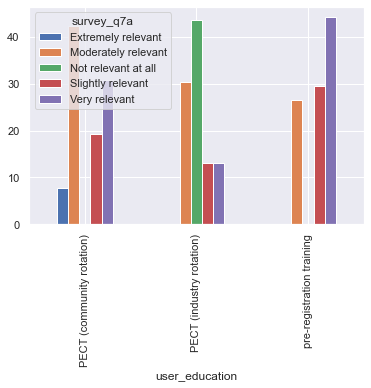

In [24]:
#survey q7a: How relevant is the chatbot content during your <<stage of education>>?

#in number of users

df11 = df.filter(items=['objectId', 'user_education', 'survey_q7a'])
survey_q7a_mymap = {'a': 'Extremely relevant', 'b': 'Very relevant', 'c': 'Moderately relevant', 'd': 'Slightly relevant', 'e': 'Not relevant at all'}
df11 = df11.applymap(lambda s: survey_q7a_mymap.get(s) if s in survey_q7a_mymap else s)
df11 = df11.groupby(['user_education','survey_q7a']).size().unstack(level=1)
df11 = df11.fillna(0)
df11

#in percentage of users for each group

cols = list(df11)
df11[cols] = df11[cols].div(df11[cols].sum(axis=1), axis=0).multiply(100)
df11

#in percentage of users for each group (graph)

df11.plot(kind = 'bar')

In [25]:
#survey q7b: Rank the educational content from most relevant to least relevant to your <<stage of education>>.

df12 = df.filter(items=['objectId', 'user_education', 'survey_q7b'])

df12['survey_q7b'] = df12['survey_q7b'].str.lower()

df12_split = df12['survey_q7b'].str.split(',', expand=True)

df12_split.columns = ['first', 'second', 'third', 'fourth']
df12_split['first'] = df12_split['first'].str.replace(' ', '')
df12_split['second'] = df12_split['second'].str.replace(' ', '')
df12_split['third'] = df12_split['third'].str.replace(' ', '')
df12_split['fourth'] = df12_split['fourth'].str.replace(' ', '')

df12 = pd.concat([df12['user_education'], df12_split], axis=1)

#for the PECT (community rotation) group

df12_pect_comm = df12[df12['user_education'] == "PECT (community rotation)"]

df12_pect_comm_first = pd.DataFrame(df12_pect_comm['first'].value_counts())
df12_pect_comm_first.reset_index(level=0, inplace=True)

df12_pect_comm_second = pd.DataFrame(df12_pect_comm['second'].value_counts())
df12_pect_comm_second.reset_index(level=0, inplace=True)

df12_pect_comm_third = pd.DataFrame(df12_pect_comm['third'].value_counts())
df12_pect_comm_third.reset_index(level=0, inplace=True)

df12_pect_comm_fourth = pd.DataFrame(df12_pect_comm['fourth'].value_counts())
df12_pect_comm_fourth.reset_index(level=0, inplace=True)

data_frames = [df12_pect_comm_first, df12_pect_comm_second, df12_pect_comm_third, df12_pect_comm_fourth]
df12_pect_comm = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df12_pect_comm['total_count'] = df12_pect_comm.iloc[:,1:5].sum(axis=1)
df12_pect_comm['weighted_avg_rank'] = ((df12_pect_comm['first'] * 1) +  (df12_pect_comm['second'] * 2) + (df12_pect_comm['third'] * 3) + (df12_pect_comm['fourth'] * 4)) / df12_pect_comm['total_count']
survey_q7b_mymap = {'a': 'Common factors that affect long-term BPV', 'b': 'How the factors affect long-term BPV', 'c': 'Appropriate questions to probe the patients to identify the factors affecting their long-term BPV', 'd': 'Management plan(s) for the factors affecting long-term BPV'}
df12_pect_comm = df12_pect_comm.applymap(lambda s: survey_q7b_mymap.get(s) if s in survey_q7b_mymap else s)
df12_pect_comm

#for the PECT (industry rotation) group

df12_pect_ind = df12[df12['user_education'] == "PECT (industry rotation)"]

df12_pect_ind_first = pd.DataFrame(df12_pect_ind['first'].value_counts())
df12_pect_ind_first.reset_index(level=0, inplace=True)

df12_pect_ind_second = pd.DataFrame(df12_pect_ind['second'].value_counts())
df12_pect_ind_second.reset_index(level=0, inplace=True)

df12_pect_ind_third = pd.DataFrame(df12_pect_ind['third'].value_counts())
df12_pect_ind_third.reset_index(level=0, inplace=True)

df12_pect_ind_fourth = pd.DataFrame(df12_pect_ind['fourth'].value_counts())
df12_pect_ind_fourth.reset_index(level=0, inplace=True)

data_frames = [df12_pect_ind_first, df12_pect_ind_second, df12_pect_ind_third, df12_pect_ind_fourth]
df12_pect_ind = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df12_pect_ind['total_count'] = df12_pect_ind.iloc[:,1:5].sum(axis=1)
df12_pect_ind['weighted_avg_rank'] = ((df12_pect_ind['first'] * 1) +  (df12_pect_ind['second'] * 2) + (df12_pect_ind['third'] * 3) + (df12_pect_ind['fourth'] * 4)) / df12_pect_ind['total_count']
survey_q7b_mymap = {'a': 'Common factors that affect long-term BPV', 'b': 'How the factors affect long-term BPV', 'c': 'Appropriate questions to probe the patients to identify the factors affecting their long-term BPV', 'd': 'Management plan(s) for the factors affecting long-term BPV'}
df12_pect_ind = df12_pect_ind.applymap(lambda s: survey_q7b_mymap.get(s) if s in survey_q7b_mymap else s)
df12_pect_ind

#for the pre-registration training group

df12_prereg = df12[df12['user_education'] == "pre-registration training"]

df12_prereg_first = pd.DataFrame(df12_prereg['first'].value_counts())
df12_prereg_first.reset_index(level=0, inplace=True)

df12_prereg_second = pd.DataFrame(df12_prereg['second'].value_counts())
df12_prereg_second.reset_index(level=0, inplace=True)

df12_prereg_third = pd.DataFrame(df12_prereg['third'].value_counts())
df12_prereg_third.reset_index(level=0, inplace=True)

df12_prereg_fourth = pd.DataFrame(df12_prereg['fourth'].value_counts())
df12_prereg_fourth.reset_index(level=0, inplace=True)

data_frames = [df12_prereg_first, df12_prereg_second, df12_prereg_third, df12_prereg_fourth]
df12_prereg = reduce(lambda left,right: pd.merge(left,right,on=['index'], how='outer'), data_frames).fillna(0)
df12_prereg['total_count'] = df12_prereg.iloc[:,1:5].sum(axis=1)
df12_prereg['weighted_avg_rank'] = ((df12_prereg['first'] * 1) +  (df12_prereg['second'] * 2) + (df12_prereg['third'] * 3) + (df12_prereg['fourth'] * 4)) / df12_prereg['total_count']
survey_q7b_mymap = {'a': 'Common factors that affect long-term BPV', 'b': 'How the factors affect long-term BPV', 'c': 'Appropriate questions to probe the patients to identify the factors affecting their long-term BPV', 'd': 'Management plan(s) for the factors affecting long-term BPV'}
df12_prereg = df12_prereg.applymap(lambda s: survey_q7b_mymap.get(s) if s in survey_q7b_mymap else s)
df12_prereg

,index,first,second,third,fourth,total_count,weighted_avg_rank
0,Common factors that affect long-term BPV,14.0,4.0,7,1.0,26.0,1.807692
1,Appropriate questions to probe the patients to...,11.0,7.0,8,0.0,26.0,1.884615
2,Management plan(s) for the factors affecting l...,1.0,15.0,7,3.0,26.0,2.461538
3,How the factors affect long-term BPV,0.0,0.0,4,22.0,26.0,3.846154


,index,first,second,third,fourth,total_count,weighted_avg_rank
0,Common factors that affect long-term BPV,12.0,8.0,3,0.0,23.0,1.608696
1,Appropriate questions to probe the patients to...,8.0,10.0,5,0.0,23.0,1.869565
2,Management plan(s) for the factors affecting l...,3.0,5.0,14,1.0,23.0,2.565217
3,How the factors affect long-term BPV,0.0,0.0,1,22.0,23.0,3.956522


,index,first,second,third,fourth,total_count,weighted_avg_rank
0,Common factors that affect long-term BPV,19.0,8.0,6,1.0,34.0,1.676471
1,Appropriate questions to probe the patients to...,13.0,11.0,10,0.0,34.0,1.911765
2,Management plan(s) for the factors affecting l...,2.0,15.0,16,1.0,34.0,2.470588
3,How the factors affect long-term BPV,0.0,0.0,2,32.0,34.0,3.941176


survey_q8,Less than once a month,Once a month,Once a week
user_education,,,
PECT (community rotation),15.0,7.0,4.0
PECT (industry rotation),17.0,6.0,0.0
pre-registration training,18.0,13.0,3.0


survey_q8,Less than once a month,Once a month,Once a week
user_education,,,
PECT (community rotation),57.692308,26.923077,15.384615
PECT (industry rotation),73.913043,26.086957,0.000000
pre-registration training,52.941176,38.235294,8.823529


<AxesSubplot:xlabel='user_education'>

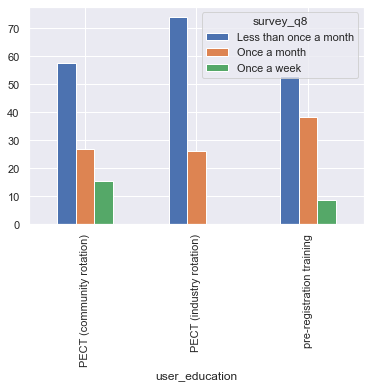

In [26]:
#survey q8: How frequent would you be using this chatbot during your stage of education?

#in number of users

df13 = df.filter(items=['objectId', 'user_education', 'survey_q8'])
survey_q8_mymap = {'a': 'More than once a day', 'b': 'Once a day', 'c': 'Once a week', 'd': 'Once a month', 'e': 'Less than once a month'}
df13 = df13.applymap(lambda s: survey_q8_mymap.get(s) if s in survey_q8_mymap else s)
df13 = df13.groupby(['user_education','survey_q8']).size().unstack(level=1)
df13 = df13.fillna(0)
df13

#in percentage of users for each group

cols = list(df13)
df13[cols] = df13[cols].div(df13[cols].sum(axis=1), axis=0).multiply(100)
df13

#in percentage of users for each group (graph)

df13.plot(kind = 'bar')

In [27]:
#have a glance at the updated data

df['pre_total_score'] = df['pre_q1_score'] + df['pre_q2_score'] + df['pre_q3_score'] + df['pre_q4_score'] + df['pre_q5_score']
df['post_total_score'] = df['post_q1_score'] + df['post_q2_score'] + df['post_q3_score'] + df['post_q4_score'] + df['post_q5_score']
df.head()

,objectId,user_education,pre_q1,pre_q2,pre_q3,pre_q4,pre_q5,post_q1,post_q2,post_q3,...,pre_q3_score,pre_q4_score,pre_q5_score,post_q1_score,post_q2_score,post_q3_score,post_q4_score,post_q5_score,pre_total_score,post_total_score
0,nR0eH4BXBxqQ7Askn6B7,PECT (community rotation),"a,b","a,b,d",a,"a,b","a,d","a,b,d","a,c,d",a,...,1,0.666667,0.666667,1.0,1.000000,1,1.0,1.0,4.000000,5.000000
1,CUT0EUn0nhZAbFXeh0wP,pre-registration training,"A, D","A, D",a,C,"A, D","A, B, D","A, C, D",a,...,1,0.000000,0.666667,1.0,1.000000,1,0.5,1.0,3.333333,4.500000
2,NzwaGfA323uHOcrx36cT,pre-registration training,"a, b, d","a,c",a,"a, b, d","a, b, c, d","a, b, c, d","a, c, d",a,...,1,1.000000,1.000000,1.0,1.000000,1,1.0,1.0,4.166667,5.000000
3,lUx7IcNBfmGYtJfAJY9F,PECT (community rotation),"a,d","a,c",a,"a,b,d","a,c,d","a,b,c,d","a,b,d",a,...,1,1.000000,1.000000,1.0,0.666667,1,1.0,1.0,4.166667,4.666667
4,mLxmeiMBSAs6RPbKpRge,pre-registration training,"a, b, c, d","a, c",a,"a, b, d","a, c, d","a, b, d","a, b, d",a,...,1,1.000000,1.000000,1.0,0.666667,1,0.5,1.0,4.500000,4.166667


In [28]:
df_pre_reg = df[df['user_education'] == 'pre-registration training'][['pre_total_score', 'post_total_score']]
df_pre_reg_pre = df_pre_reg[['pre_total_score']]
df_pre_reg_post = df_pre_reg[['post_total_score']]
df_pre_reg_diff = df_pre_reg['post_total_score'] - df_pre_reg['pre_total_score']

df_comm = df[df['user_education'] == 'PECT (community rotation)'][['pre_total_score', 'post_total_score']]
df_comm_pre = df_comm[['pre_total_score']]
df_comm_post = df_comm[['post_total_score']]
df_comm_diff = df_comm['post_total_score'] - df_comm['pre_total_score']

df_ind = df[df['user_education'] == 'PECT (industry rotation)'][['pre_total_score', 'post_total_score']]
df_ind_pre = df_ind[['pre_total_score']]
df_ind_post = df_ind[['post_total_score']]
df_ind_diff = df_ind['post_total_score'] - df_ind['pre_total_score']

In [29]:
#Shapiro-Wilk test for normality 

#on the overall pre-learning test scores for the pre-registration training group
shapiro_test_pre_reg_pre = stats.shapiro(df_pre_reg_pre)
shapiro_test_pre_reg_pre

#on the overall post-learning test scores for the pre-registration training group
shapiro_test_pre_reg_post = stats.shapiro(df_pre_reg_post)
shapiro_test_pre_reg_post

#on the difference between pre- and post-learning test scores for the pre-registration training group
shapiro_test_pre_reg_diff = stats.shapiro(df_pre_reg_diff)
shapiro_test_pre_reg_diff

#on the overall pre-learning test scores for the PECT (community) group
shapiro_test_pect_comm_pre = stats.shapiro(df_comm_pre)
shapiro_test_pect_comm_pre

#on the overall post-learning test scores for the PECT (community) group
shapiro_test_pect_comm_post = stats.shapiro(df_comm_post)
shapiro_test_pect_comm_post

#on the difference between pre- and post-learning test scores for the PECT (community) group
shapiro_test_df_comm_diff = stats.shapiro(df_comm_diff)
shapiro_test_df_comm_diff

#on the overall pre-learning test scores for the PECT (industry) group
shapiro_test_pect_ind_pre = stats.shapiro(df_ind_pre)
shapiro_test_pect_ind_pre

#on the overall post-learning test scores for the PECT (industry) group
shapiro_test_pect_ind_post = stats.shapiro(df_ind_post)
shapiro_test_pect_ind_post

#on the difference between pre- and post-learning test scores for the PECT (industry) group
shapiro_test_ind_diff = stats.shapiro(df_ind_diff)
shapiro_test_ind_diff

ShapiroResult(statistic=0.9544362425804138, pvalue=0.16663327813148499)

ShapiroResult(statistic=0.9361758828163147, pvalue=0.047477979212999344)

ShapiroResult(statistic=0.9705243706703186, pvalue=0.47608324885368347)

ShapiroResult(statistic=0.9284019470214844, pvalue=0.07099725306034088)

ShapiroResult(statistic=0.8851564526557922, pvalue=0.007410846184939146)

ShapiroResult(statistic=0.9663644433021545, pvalue=0.5318065881729126)

ShapiroResult(statistic=0.969998300075531, pvalue=0.6889638900756836)

ShapiroResult(statistic=0.9564438462257385, pvalue=0.39544710516929626)

ShapiroResult(statistic=0.9754382967948914, pvalue=0.8158712983131409)

In [30]:
#pre-, post-learning test scores and their difference for the pre-registration training group

df_pre_reg['prereg_score_diff'] = df_pre_reg['post_total_score'] - df_pre_reg['pre_total_score']
df_pre_reg.describe()

#Wilcoxon signed-rank test between the pre- and post-learning test scores

stats.wilcoxon(df_pre_reg['post_total_score'], df_pre_reg['pre_total_score'], alternative='greater')

#conclusion: statistically significant score improvement for pre-registration training group

,pre_total_score,post_total_score,prereg_score_diff
count,34.000000,34.000000,34.000000
mean,3.789216,4.348039,0.558824
std,0.691834,0.444509,0.675301
min,2.500000,3.500000,-0.833333
25%,3.333333,4.000000,0.166667
50%,3.750000,4.333333,0.666667
75%,4.166667,4.666667,1.000000
max,5.000000,5.000000,1.666667


WilcoxonResult(statistic=489.0, pvalue=9.648474408967074e-05)

In [31]:
#pre-, post-learning test scores and their difference for the PECT (community) group

df_comm['comm_score_diff'] = df_comm['post_total_score'] - df_comm['pre_total_score']
df_comm.describe()

#Wilcoxon signed-rank test between the pre- and post-learning test scores

stats.wilcoxon(df_comm['post_total_score'], df_comm['pre_total_score'], alternative='greater')

#conclusion: statistically significant score improvement for PECT (community) training group

,pre_total_score,post_total_score,comm_score_diff
count,26.000000,26.000000,26.000000
mean,3.179487,4.057692,0.878205
std,0.852347,0.821844,0.917191
min,1.500000,2.333333,-0.666667
25%,2.541667,3.708333,0.208333
50%,3.500000,4.083333,0.833333
75%,3.833333,4.666667,1.500000
max,4.333333,5.000000,3.166667


WilcoxonResult(statistic=298.0, pvalue=0.00013102656344575925)

In [32]:
#pre-, post-learning test scores and their difference for the PECT (industry) group

df_ind['ind_score_diff'] = df_ind['post_total_score'] - df_ind['pre_total_score']
df_ind.describe()

#Wilcoxon signed-rank test between the pre- and post-learning test scores

stats.wilcoxon(df_ind['post_total_score'], df_ind['pre_total_score'], alternative='greater')

#conclusion: statistically significant score improvement for PECT (industry) training group

,pre_total_score,post_total_score,ind_score_diff
count,23.000000,23.000000,23.000000
mean,3.137681,4.057971,0.920290
std,0.634950,0.608460,0.893113
min,1.833333,2.833333,-0.666667
25%,2.750000,3.583333,0.333333
50%,3.166667,4.000000,0.833333
75%,3.500000,4.583333,1.583333
max,4.166667,5.000000,2.833333


/home/jianyang/my_project_dir/my_env/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=237.0, pvalue=0.00016455319733510624)

KruskalResult(statistic=3.0028977518442037, pvalue=0.2228071063208662)

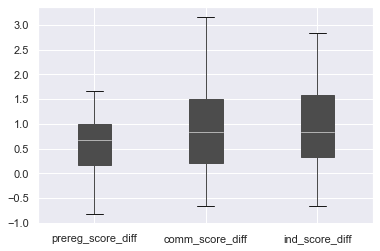

In [33]:
#boxplot of score differential for the 3 groups

boxplot_df = pd.concat([df_pre_reg['prereg_score_diff'], df_comm['comm_score_diff'], df_ind['ind_score_diff']], axis=1)
boxplot = boxplot_df.boxplot(patch_artist=True)

#Kruskal-Wallis test between the score differentials

stats.kruskal(df_comm_diff, df_ind_diff, df_pre_reg_diff)

#conclusion: no statistically signficant difference in score differential between the 3 groups

In [34]:
#updated data

df14 = df.filter(items=['objectId', 'survey_q4a'])
survey_q4a_mymap = {'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1}
df14 = df14.applymap(lambda s: survey_q4a_mymap.get(s) if s in survey_q4a_mymap else s)
df14.rename(columns={'survey_q4a':'survey_q4a_score'}, inplace=True)
df = pd.concat([df, df14['survey_q4a_score']], axis=1)

df15 = df.filter(items=['objectId', 'survey_q4b'])
survey_q4b_mymap = {'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1}
df15 = df15.applymap(lambda s: survey_q4b_mymap.get(s) if s in survey_q4b_mymap else s)
df15.rename(columns={'survey_q4b':'survey_q4b_score'}, inplace=True)
df = pd.concat([df, df15['survey_q4b_score']], axis=1)

df16 = df.filter(items=['objectId', 'survey_q5a'])
survey_q5a_mymap = {'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1}
df16 = df16.applymap(lambda s: survey_q5a_mymap.get(s) if s in survey_q5a_mymap else s)
df16.rename(columns={'survey_q5a':'survey_q5a_score'}, inplace=True)
df = pd.concat([df, df16['survey_q5a_score']], axis=1)

df17 = df.filter(items=['objectId', 'survey_q5b'])
survey_q5b_mymap = {'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1}
df17 = df17.applymap(lambda s: survey_q5b_mymap.get(s) if s in survey_q5b_mymap else s)
df17.rename(columns={'survey_q5b':'survey_q5b_score'}, inplace=True)
df = pd.concat([df, df17['survey_q5b_score']], axis=1)

df['identification_diff_perception'] = df['survey_q4b_score'] - df['survey_q4a_score']
df['management_diff_perception'] = df['survey_q5b_score'] - df['survey_q5a_score']

df['identification_diff_test'] = df['post_q1_score'] + df['post_q4_score'] - (df['pre_q1_score'] + df['pre_q4_score'])
df['management_diff_test'] = df['post_q2_score'] + df['post_q5_score'] - (df['pre_q2_score'] + df['pre_q5_score'])

df

,objectId,user_education,pre_q1,pre_q2,pre_q3,pre_q4,pre_q5,post_q1,post_q2,post_q3,...,pre_total_score,post_total_score,survey_q4a_score,survey_q4b_score,survey_q5a_score,survey_q5b_score,identification_diff_perception,management_diff_perception,identification_diff_test,management_diff_test
0,nR0eH4BXBxqQ7Askn6B7,PECT (community rotation),"a,b","a,b,d",a,"a,b","a,d","a,b,d","a,c,d",a,...,4.000000,5.000000,3,3,3,3,0,0,0.666667,0.333333
1,CUT0EUn0nhZAbFXeh0wP,pre-registration training,"A, D","A, D",a,C,"A, D","A, B, D","A, C, D",a,...,3.333333,4.500000,2,4,2,3,2,1,0.833333,0.333333
2,NzwaGfA323uHOcrx36cT,pre-registration training,"a, b, d","a,c",a,"a, b, d","a, b, c, d","a, b, c, d","a, c, d",a,...,4.166667,5.000000,5,4,5,5,-1,0,0.333333,0.500000
3,lUx7IcNBfmGYtJfAJY9F,PECT (community rotation),"a,d","a,c",a,"a,b,d","a,c,d","a,b,c,d","a,b,d",a,...,4.166667,4.666667,3,4,3,3,1,0,0.333333,0.166667
4,mLxmeiMBSAs6RPbKpRge,pre-registration training,"a, b, c, d","a, c",a,"a, b, d","a, c, d","a, b, d","a, b, d",a,...,4.500000,4.166667,1,2,1,4,1,3,-0.500000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,s5iqNr1xkWHFvh8hlmGB,PECT (community rotation),"A, b, d",D,a,"A, b","A, b, c","B, d","A, c, d",a,...,3.500000,4.666667,4,4,4,4,0,0,0.333333,0.833333
79,PosA3ijlNO2R366ou7Yw,PECT (industry rotation),"A, B","A, C",a,B,A,"A, B, D","A, D",a,...,2.833333,4.666667,1,5,1,5,4,4,1.000000,0.833333
80,WNWxCfTGRXmCTtbQkoXl,PECT (industry rotation),a,a,b,d,"c,d","a,b,c,d","a,d",a,...,1.833333,4.666667,2,5,2,5,3,3,1.333333,0.500000
81,vyMupERq1OJen1an4P5A,PECT (industry rotation),"a, b","a, d",b,"a, b","a, d","b, c, d","a, c",a,...,3.000000,4.000000,1,4,1,5,3,4,0.333333,-0.333333


In [35]:
df_prereg_corr = df[df['user_education'] == 'pre-registration training'][['identification_diff_test', 'management_diff_test', 'identification_diff_perception', 'management_diff_perception']]
df_comm_corr = df[df['user_education'] == 'PECT (community rotation)'][['identification_diff_test', 'management_diff_test', 'identification_diff_perception', 'management_diff_perception']]
df_ind_corr = df[df['user_education'] == 'PECT (industry rotation)'][['identification_diff_test', 'management_diff_test', 'identification_diff_perception', 'management_diff_perception']]

In [36]:
#for the pre-registration training group

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge [on identification of factors affecting long-term BPV]

df_prereg_corr_identification = df_prereg_corr[['identification_diff_test', 'identification_diff_perception']]
stats.kendalltau(df_prereg_corr['identification_diff_test'], df_prereg_corr['identification_diff_perception'])

#conclusion: negligable correlation, not statistically significant

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge [on management of factors affecting long-term BPV]

df_prereg_corr_management = df_prereg_corr[['management_diff_test', 'management_diff_perception']]
stats.kendalltau(df_prereg_corr['management_diff_test'], df_prereg_corr['management_diff_perception'])

#conclusion: negligable correlation, not statistically significant

KendalltauResult(correlation=0.15736998685076214, pvalue=0.25189253225271324)

KendalltauResult(correlation=-0.017103155836767758, pvalue=0.9005876217059309)

In [37]:
#for the PECT (community) group

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge [on identification of factors affecting long-term BPV]

df_comm_corr_identification = df_comm_corr[['identification_diff_test', 'identification_diff_perception']]
stats.kendalltau(df_comm_corr['identification_diff_test'], df_comm_corr['identification_diff_perception'])

#conclusion: negligable correlation, not statistically significant

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge [on management of factors affecting long-term BPV]

df_comm_corr_management = df_comm_corr[['management_diff_test', 'management_diff_perception']]
stats.kendalltau(df_comm_corr['management_diff_test'], df_comm_corr['management_diff_perception'])

#conclusion: negligable correlation, not statistically significant

KendalltauResult(correlation=-0.10505549709297515, pvalue=0.5091562995340383)

KendalltauResult(correlation=-0.048838370567834424, pvalue=0.7604387705355786)

In [38]:
#for the PECT (industry) group

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge [on identification of factors affecting long-term BPV]

df_ind_corr_identification = df_ind_corr[['identification_diff_test', 'identification_diff_perception']]
stats.kendalltau(df_ind_corr['identification_diff_test'], df_ind_corr['identification_diff_perception'])

#conclusion: moderate positive correlation, statistically significant

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge [on management of factors affecting long-term BPV]

df_ind_corr_management = df_ind_corr[['management_diff_test', 'management_diff_perception']]
stats.kendalltau(df_ind_corr['management_diff_test'], df_ind_corr['management_diff_perception'])

#conclusion: negligable correlation, not statistically significant

KendalltauResult(correlation=0.4213233131809254, pvalue=0.013050629786313833)

KendalltauResult(correlation=0.21309769595029335, pvalue=0.19788820278106312)

<AxesSubplot:xlabel='management_diff_test', ylabel='management_diff_perception'>

<AxesSubplot:xlabel='management_diff_test', ylabel='management_diff_perception'>

<AxesSubplot:xlabel='management_diff_test', ylabel='management_diff_perception'>

<AxesSubplot:xlabel='identification_diff_test', ylabel='identification_diff_perception'>

<AxesSubplot:xlabel='identification_diff_test', ylabel='identification_diff_perception'>

<AxesSubplot:xlabel='identification_diff_test', ylabel='identification_diff_perception'>

[(-1.5, 1.5),
 (-1.5, 4.5),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Perception differential (knowledge on management)')]

[(-1.5, 1.5),
 (-1.5, 4.5),
 Text(0.5, 0, 'Assessment score differential (knowledge on management)'),
 Text(0, 0.5, '')]

[(-1.5, 1.5), (-1.5, 4.5), Text(0.5, 0, ''), Text(0, 0.5, '')]

[(-1.5, 1.5),
 (-1.5, 4.5),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Perception differential (knowledge on identification)')]

[Text(0.5, 1.0, 'Pre-registration')]

[(-1.5, 1.5),
 (-1.5, 4.5),
 Text(0.5, 0, 'Assessment score differential (knowledge on identification)'),
 Text(0, 0.5, '')]

[Text(0.5, 1.0, 'PECT (community)')]

[(-1.5, 1.5), (-1.5, 4.5), Text(0.5, 0, ''), Text(0, 0.5, '')]

[Text(0.5, 1.0, 'PECT (industry)')]

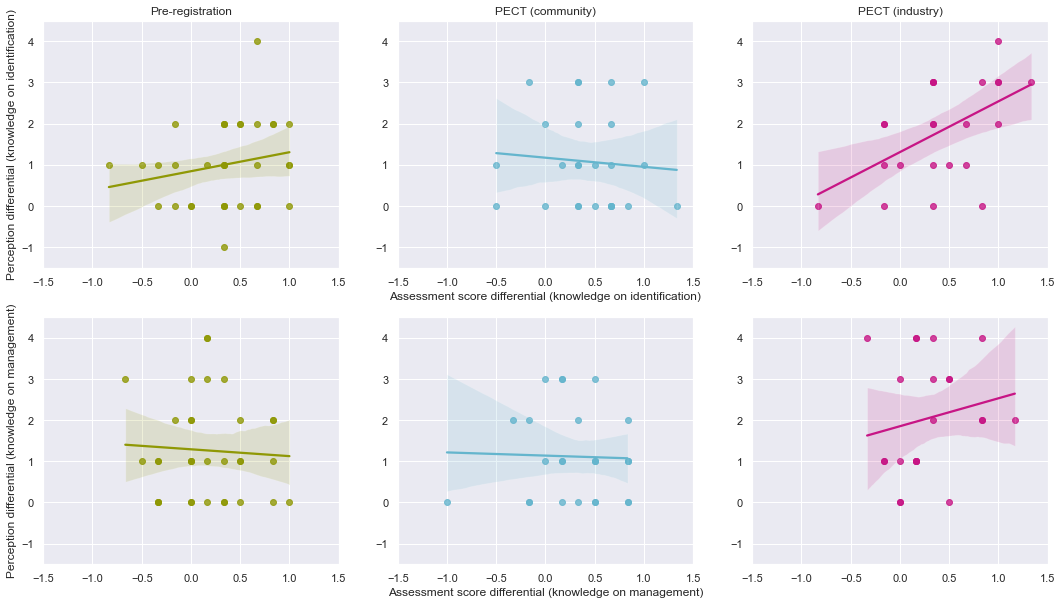

In [39]:
#graphical representation of the correlation coefficient between actual test scores and perceived level of knowledge for the 3 groups

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.regplot(x="management_diff_test", y="management_diff_perception", data=df_prereg_corr_management, ax=axes[1, 0], color='#8f9805')
sns.regplot(x="management_diff_test", y="management_diff_perception", data=df_comm_corr_management, ax=axes[1, 1], color='c')
sns.regplot(x="management_diff_test", y="management_diff_perception", data=df_ind_corr_management, ax=axes[1, 2], color='mediumvioletred')
sns.regplot(x="identification_diff_test", y="identification_diff_perception", data=df_prereg_corr_identification, ax=axes[0, 0], color='#8f9805')
sns.regplot(x="identification_diff_test", y="identification_diff_perception", data=df_comm_corr_identification, ax=axes[0, 1], color='c')
sns.regplot(x="identification_diff_test", y="identification_diff_perception", data=df_ind_corr_identification, ax=axes[0, 2], color='mediumvioletred')
axes[1,0].set(xlim=(-1.5, 1.5), ylim=(-1.5, 4.5), xlabel= None, ylabel= 'Perception differential (knowledge on management)', )
axes[1,1].set(xlim=(-1.5, 1.5), ylim=(-1.5, 4.5), xlabel= 'Assessment score differential (knowledge on management)', ylabel= None)
axes[1,2].set(xlim=(-1.5, 1.5), ylim=(-1.5, 4.5), xlabel= None, ylabel= None)
axes[0,0].set(xlim=(-1.5, 1.5), ylim=(-1.5, 4.5), xlabel= None, ylabel= 'Perception differential (knowledge on identification)')
axes[0,0].set(title='Pre-registration')
axes[0,1].set(xlim=(-1.5, 1.5), ylim=(-1.5, 4.5), xlabel= 'Assessment score differential (knowledge on identification)', ylabel= None)
axes[0,1].set(title='PECT (community)')
axes[0,2].set(xlim=(-1.5, 1.5), ylim=(-1.5, 4.5), xlabel= None, ylabel= None)
axes[0,2].set(title='PECT (industry)')
plt.show()

In [40]:
#updated data

df['identification_post_test'] = df['post_q1_score'] + df['post_q4_score']
df['identification_pre_test'] = df['pre_q1_score'] + df['pre_q4_score']
df['management_post_test'] = df['post_q2_score'] + df['post_q5_score']
df['management_pre_test'] = df['pre_q2_score'] + df['pre_q5_score']

df_prereg_corr_2 = df[df['user_education'] == 'pre-registration training'][['survey_q4a_score', 'survey_q4b_score', 'survey_q5a_score', 'survey_q5b_score', 'management_pre_test', 'management_post_test', 'identification_pre_test', 'identification_post_test']]
df_comm_corr_2 = df[df['user_education'] == 'PECT (community rotation)'][['survey_q4a_score', 'survey_q4b_score', 'survey_q5a_score', 'survey_q5b_score', 'management_pre_test', 'management_post_test', 'identification_pre_test', 'identification_post_test']]
df_ind_corr_2 = df[df['user_education'] == 'PECT (industry rotation)'][['survey_q4a_score', 'survey_q4b_score', 'survey_q5a_score', 'survey_q5b_score', 'management_pre_test', 'management_post_test', 'identification_pre_test', 'identification_post_test']]

In [41]:
#for the pre-registration training group

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge, for both pre- and post-learning

stats.kendalltau(df_prereg_corr_2['survey_q4a_score'], df_prereg_corr_2['identification_pre_test'])
stats.kendalltau(df_prereg_corr_2['survey_q4b_score'], df_prereg_corr_2['identification_post_test'])
stats.kendalltau(df_prereg_corr_2['survey_q5a_score'], df_prereg_corr_2['management_pre_test'])
stats.kendalltau(df_prereg_corr_2['survey_q5b_score'], df_prereg_corr_2['management_post_test'])

#conclusion: all negligable correlation, not statistically significant

KendalltauResult(correlation=0.2271554252121273, pvalue=0.11161464228738378)

KendalltauResult(correlation=0.06442550097815462, pvalue=0.6671481939692023)

KendalltauResult(correlation=0.14972151149925939, pvalue=0.29070738669372653)

KendalltauResult(correlation=-0.15612981557711997, pvalue=0.3163494829310012)

In [42]:
#for the PECT (community) group

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge, for both pre- and post-learning

stats.kendalltau(df_comm_corr_2['survey_q4a_score'], df_comm_corr_2['identification_pre_test'])
stats.kendalltau(df_comm_corr_2['survey_q4b_score'], df_comm_corr_2['identification_post_test'])
stats.kendalltau(df_comm_corr_2['survey_q5a_score'], df_comm_corr_2['management_pre_test'])
stats.kendalltau(df_comm_corr_2['survey_q5b_score'], df_comm_corr_2['management_post_test'])

#conclusion: all negligable correlation, not statistically significant; except for between post-learning identification score and perception (moderate negative correlation)

KendalltauResult(correlation=-0.245181892901518, pvalue=0.13953962742990672)

KendalltauResult(correlation=-0.42633618882242774, pvalue=0.013125360411551096)

KendalltauResult(correlation=-0.22937672185417132, pvalue=0.1667924490382371)

KendalltauResult(correlation=-0.16102535770970636, pvalue=0.36813333324013775)

In [43]:
#for the PECT (industry) group

#Kendall rank correlation coefficient between actual test scores and perceived level of knowledge, for both pre- and post-learning

stats.kendalltau(df_ind_corr_2['survey_q4a_score'], df_ind_corr_2['identification_pre_test'])
stats.kendalltau(df_ind_corr_2['survey_q4b_score'], df_ind_corr_2['identification_post_test'])
stats.kendalltau(df_ind_corr_2['survey_q5a_score'], df_ind_corr_2['management_pre_test'])
stats.kendalltau(df_ind_corr_2['survey_q5b_score'], df_ind_corr_2['management_post_test'])

#conclusion: all negligable correlation, not statistically significant; except for between post-learning identification score and perception (moderate positive correlation)

KendalltauResult(correlation=0.1350447409819031, pvalue=0.4646816412035434)

KendalltauResult(correlation=0.35800029384704146, pvalue=0.05298938603131427)

KendalltauResult(correlation=0.2913428162916919, pvalue=0.10399159980765983)

KendalltauResult(correlation=-0.08336074110691877, pvalue=0.6718703645852881)

<AxesSubplot:xlabel='identification_post_test', ylabel='survey_q4b_score'>

<AxesSubplot:xlabel='identification_post_test', ylabel='survey_q4b_score'>

<AxesSubplot:xlabel='identification_post_test', ylabel='survey_q4b_score'>

<AxesSubplot:xlabel='identification_pre_test', ylabel='survey_q4a_score'>

<AxesSubplot:xlabel='identification_pre_test', ylabel='survey_q4a_score'>

<AxesSubplot:xlabel='identification_pre_test', ylabel='survey_q4a_score'>

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Perception (knowledge on identification after using chatbot)')]

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, 'Assessment score (knowledge on identification after using chatbot)'),
 Text(0, 0.5, '')]

[(0.5, 2.5), (0.0, 6.0), Text(0.5, 0, ''), Text(0, 0.5, '')]

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Perception (knowledge on identification before using chatbot)')]

[Text(0.5, 1.0, 'Pre-registration')]

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, 'Assessment score (knowledge on identification before using chatbot)'),
 Text(0, 0.5, '')]

[Text(0.5, 1.0, 'PECT (community)')]

[(0.5, 2.5), (0.0, 6.0), Text(0.5, 0, ''), Text(0, 0.5, '')]

[Text(0.5, 1.0, 'PECT (industry)')]

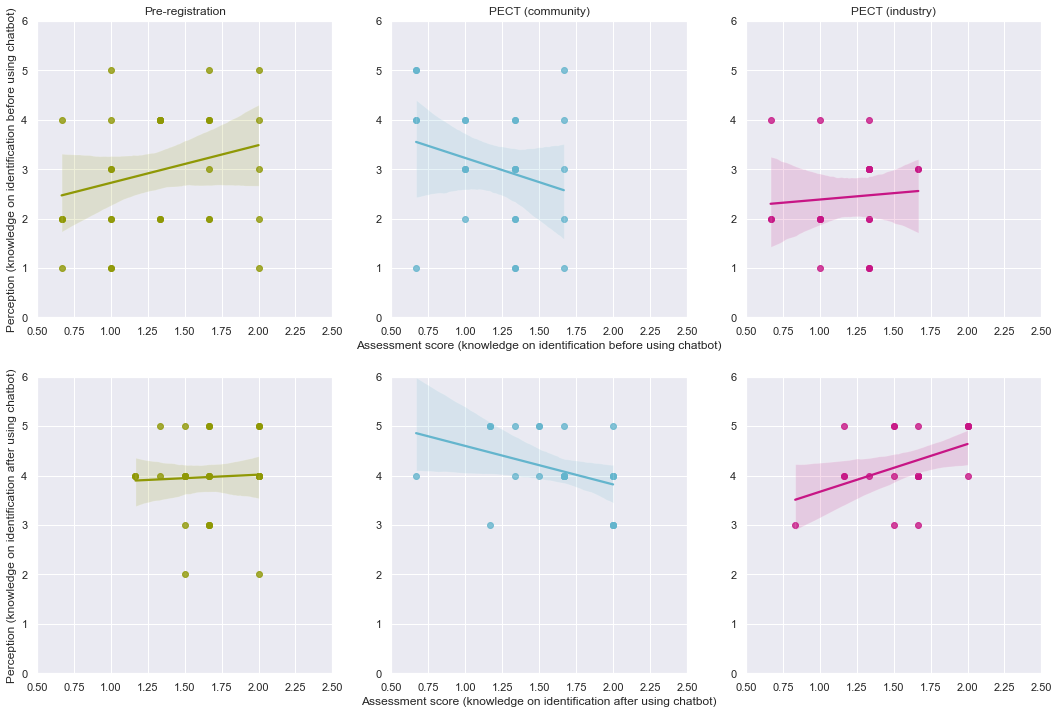

In [44]:
#graphical representation of the correlation coefficient between actual test scores and perceived level of knowledge, for both pre- and post-learning, for the 3 groups
#on the IDENTIFICATION of the factors affecting long-term BPV

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.regplot(x="identification_post_test", y="survey_q4b_score", data=df_prereg_corr_2, ax=axes[1, 0], color='#8f9805')
sns.regplot(x="identification_post_test", y="survey_q4b_score", data=df_comm_corr_2, ax=axes[1, 1], color='c')
sns.regplot(x="identification_post_test", y="survey_q4b_score", data=df_ind_corr_2, ax=axes[1, 2], color='mediumvioletred')
sns.regplot(x="identification_pre_test", y="survey_q4a_score", data=df_prereg_corr_2, ax=axes[0, 0], color='#8f9805')
sns.regplot(x="identification_pre_test", y="survey_q4a_score", data=df_comm_corr_2, ax=axes[0, 1], color='c')
sns.regplot(x="identification_pre_test", y="survey_q4a_score", data=df_ind_corr_2, ax=axes[0, 2], color='mediumvioletred')
axes[1,0].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= 'Perception (knowledge on identification after using chatbot)', )
axes[1,1].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= 'Assessment score (knowledge on identification after using chatbot)', ylabel= None)
axes[1,2].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= None)
axes[0,0].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= 'Perception (knowledge on identification before using chatbot)')
axes[0,0].set(title='Pre-registration')
axes[0,1].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= 'Assessment score (knowledge on identification before using chatbot)', ylabel= None)
axes[0,1].set(title='PECT (community)')
axes[0,2].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= None)
axes[0,2].set(title='PECT (industry)')
plt.show()

<AxesSubplot:xlabel='management_post_test', ylabel='survey_q5b_score'>

<AxesSubplot:xlabel='management_post_test', ylabel='survey_q5b_score'>

<AxesSubplot:xlabel='management_post_test', ylabel='survey_q5b_score'>

<AxesSubplot:xlabel='management_pre_test', ylabel='survey_q5a_score'>

<AxesSubplot:xlabel='management_pre_test', ylabel='survey_q5a_score'>

<AxesSubplot:xlabel='management_pre_test', ylabel='survey_q5a_score'>

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Perception (knowledge on management after using chatbot)')]

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, 'Assessment score (knowledge on management after using chatbot)'),
 Text(0, 0.5, '')]

[(0.5, 2.5), (0.0, 6.0), Text(0.5, 0, ''), Text(0, 0.5, '')]

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Perception (knowledge on management before using chatbot)')]

[Text(0.5, 1.0, 'Pre-registration')]

[(0.5, 2.5),
 (0.0, 6.0),
 Text(0.5, 0, 'Assessment score (knowledge on management before using chatbot)'),
 Text(0, 0.5, '')]

[Text(0.5, 1.0, 'PECT (community)')]

[(0.5, 2.5), (0.0, 6.0), Text(0.5, 0, ''), Text(0, 0.5, '')]

[Text(0.5, 1.0, 'PECT (industry)')]

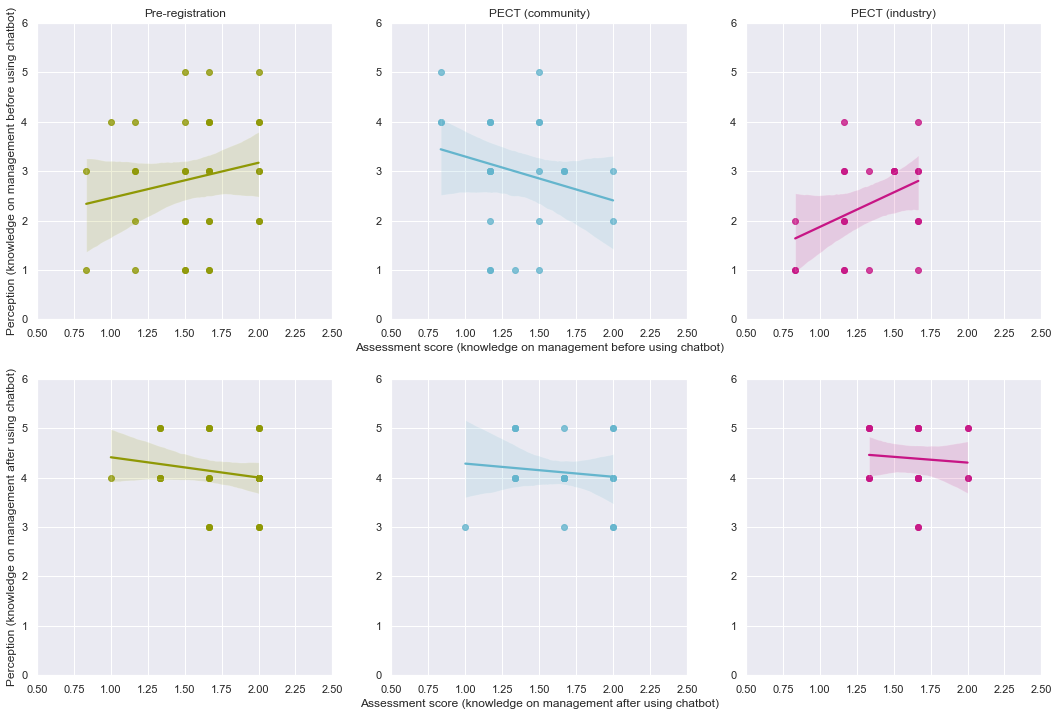

In [45]:
#graphical representation of the correlation coefficient between actual test scores and perceived level of knowledge, for both pre- and post-learning, for the 3 groups
#on the MANAGEMENT of the factors affecting long-term BPV

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.regplot(x="management_post_test", y="survey_q5b_score", data=df_prereg_corr_2, ax=axes[1, 0], color='#8f9805')
sns.regplot(x="management_post_test", y="survey_q5b_score", data=df_comm_corr_2, ax=axes[1, 1], color='c')
sns.regplot(x="management_post_test", y="survey_q5b_score", data=df_ind_corr_2, ax=axes[1, 2], color='mediumvioletred')
sns.regplot(x="management_pre_test", y="survey_q5a_score", data=df_prereg_corr_2, ax=axes[0, 0], color='#8f9805')
sns.regplot(x="management_pre_test", y="survey_q5a_score", data=df_comm_corr_2, ax=axes[0, 1], color='c')
sns.regplot(x="management_pre_test", y="survey_q5a_score", data=df_ind_corr_2, ax=axes[0, 2], color='mediumvioletred')
axes[1,0].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= 'Perception (knowledge on management after using chatbot)', )
axes[1,1].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= 'Assessment score (knowledge on management after using chatbot)', ylabel= None)
axes[1,2].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= None)
axes[0,0].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= 'Perception (knowledge on management before using chatbot)')
axes[0,0].set(title='Pre-registration')
axes[0,1].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= 'Assessment score (knowledge on management before using chatbot)', ylabel= None)
axes[0,1].set(title='PECT (community)')
axes[0,2].set(xlim=(0.5, 2.5), ylim=(0, 6), xlabel= None, ylabel= None)
axes[0,2].set(title='PECT (industry)')
plt.show()

,prereg_iden_diff,comm_iden_diff,ind_iden_diff
count,34.000000,26.000000,23.000000
mean,1.000000,1.076923,1.826087
std,1.015038,1.163549,1.192864
min,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,3.000000
max,4.000000,3.000000,4.000000


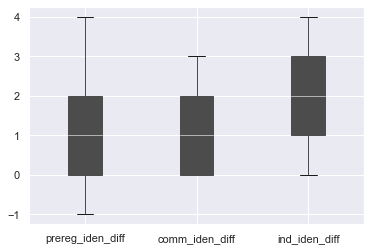

In [46]:
#boxplot of knowledge perception differential on the IDENTIFICATION of the factors affecting long-term BPV for the 3 groups

df_prereg_corr['prereg_iden_diff'] = df_prereg_corr['identification_diff_perception']
df_comm_corr['comm_iden_diff'] = df_comm_corr['identification_diff_perception']
df_ind_corr['ind_iden_diff'] = df_ind_corr['identification_diff_perception']

boxplot_df = pd.concat([df_prereg_corr['prereg_iden_diff'], df_comm_corr['comm_iden_diff'], df_ind_corr['ind_iden_diff']], axis=1)
boxplot = boxplot_df.boxplot(patch_artist=True)

boxplot_df.describe()

In [47]:
#Wilcoxon signed-rank test between the pre- and post-learning knowledge perception on the IDENTIFICATION of the factors affecting long-term BPV for the 3 groups

stats.wilcoxon(df_prereg_corr_2['survey_q4b_score'], df_prereg_corr_2['survey_q4a_score'], alternative='greater')
stats.wilcoxon(df_comm_corr_2['survey_q4b_score'], df_comm_corr_2['survey_q4a_score'], alternative='greater')
stats.wilcoxon(df_ind_corr_2['survey_q4b_score'], df_ind_corr_2['survey_q4a_score'], alternative='greater')

#conclusion: statistically significant knowledge perception improvement for all 3 groups

WilcoxonResult(statistic=269.5, pvalue=1.994451352201845e-05)

WilcoxonResult(statistic=120.0, pvalue=0.0002660027525696246)

/home/jianyang/my_project_dir/my_env/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=190.0, pvalue=5.5159969420047564e-05)

In [48]:
#Kruskal-Wallis test between the knowledge perception differentials on the IDENTIFICATION of the factors affecting long-term BPV

stats.kruskal(df_comm_corr['identification_diff_perception'], df_ind_corr['identification_diff_perception'], df_prereg_corr['identification_diff_perception'])

#conclusion: statistically significant difference in knowledge perception differentials between the 3 groups

KruskalResult(statistic=7.39686983627456, pvalue=0.024762251108910727)

In [49]:
#pairwise analysis (Mann-Whitney U test) between the knowledge perception differentials on the IDENTIFICATION of the factors affecting long-term BPV

#between the PECT (industry) and PECT (community) groups
stats.mannwhitneyu(df_comm_corr['identification_diff_perception'], df_ind_corr['identification_diff_perception'], use_continuity=True, alternative='two-sided')

#between the pre-registration training and PECT (industry) groups
stats.mannwhitneyu(df_prereg_corr['identification_diff_perception'], df_ind_corr['identification_diff_perception'], use_continuity=True, alternative='two-sided')

#between the pre-registration training and PECT (community) groups
stats.mannwhitneyu(df_prereg_corr['identification_diff_perception'], df_comm_corr['identification_diff_perception'], use_continuity=True, alternative='two-sided')

#conclusion: statistically significant difference in knowledge perception differentials between the PECT (industry) and PECT (community) groups, and between the pre-registration training and PECT (industry) groups

MannwhitneyuResult(statistic=196.0, pvalue=0.03381017897166371)

MannwhitneyuResult(statistic=236.0, pvalue=0.009386438190276528)

MannwhitneyuResult(statistic=441.0, pvalue=0.9937723710760119)

,prereg_manage_diff,comm_manage_diff,ind_manage_diff
count,34.000000,26.000000,23.000000
mean,1.264706,1.115385,2.043478
std,1.213780,1.070586,1.397344
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,3.000000
max,4.000000,3.000000,4.000000


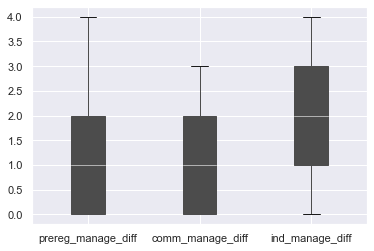

In [50]:
#boxplot of knowledge perception differential on the MANAGEMENT of the factors affecting long-term BPV for the 3 groups

df_prereg_corr['prereg_manage_diff'] = df_prereg_corr['management_diff_perception']
df_comm_corr['comm_manage_diff'] = df_comm_corr['management_diff_perception']
df_ind_corr['ind_manage_diff'] = df_ind_corr['management_diff_perception']

boxplot_df = pd.concat([df_prereg_corr['prereg_manage_diff'], df_comm_corr['comm_manage_diff'], df_ind_corr['ind_manage_diff']], axis=1)
boxplot = boxplot_df.boxplot(patch_artist=True)

boxplot_df.describe()

In [51]:
#Wilcoxon signed-rank test between the pre- and post-learning knowledge perception on the MANAGEMENT of the factors affecting long-term BPV for the 3 groups

stats.wilcoxon(df_prereg_corr_2['survey_q5b_score'], df_prereg_corr_2['survey_q5a_score'], alternative='greater')
stats.wilcoxon(df_comm_corr_2['survey_q5b_score'], df_comm_corr_2['survey_q5a_score'], alternative='greater')
stats.wilcoxon(df_ind_corr_2['survey_q5b_score'], df_ind_corr_2['survey_q5a_score'], alternative='greater')

#conclusion: statistically significant knowledge perception improvement for all 3 groups

WilcoxonResult(statistic=276.0, pvalue=1.0069560937955258e-05)

WilcoxonResult(statistic=153.0, pvalue=0.00011014631109049817)

/home/jianyang/my_project_dir/my_env/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=210.0, pvalue=3.8568200545620204e-05)

In [52]:
#Kruskal-Wallis test between the knowledge perception differentials on the MANAGEMENT of the factors affecting long-term BPV

stats.kruskal(df_comm_corr['management_diff_perception'], df_ind_corr['management_diff_perception'], df_prereg_corr['management_diff_perception'])

#conclusion: statistically significant difference in knowledge perception differentials between the 3 groups

KruskalResult(statistic=6.572681059858701, pvalue=0.037390428494239424)

In [53]:
#pairwise analysis (Mann-Whitney U test) between the knowledge perception differentials on the MANAGEMENT of the factors affecting long-term BPV

#between the PECT (industry) and PECT (community) groups
stats.mannwhitneyu(df_comm_corr['management_diff_perception'], df_ind_corr['management_diff_perception'], use_continuity=True, alternative='two-sided')

#between the pre-registration training and PECT (industry) groups
stats.mannwhitneyu(df_prereg_corr['management_diff_perception'], df_ind_corr['management_diff_perception'], use_continuity=True, alternative='two-sided')

#between the pre-registration training and PECT (community) groups
stats.mannwhitneyu(df_prereg_corr['management_diff_perception'], df_comm_corr['management_diff_perception'], use_continuity=True, alternative='two-sided')

#conclusion: statistically significant difference in knowledge perception differentials between the PECT (industry) and PECT (community) groups, and between the pre-registration training and PECT (industry) groups

MannwhitneyuResult(statistic=184.0, pvalue=0.018054923413318227)

MannwhitneyuResult(statistic=265.0, pvalue=0.035635506072066135)

MannwhitneyuResult(statistic=466.0, pvalue=0.7146199577906074)

<AxesSubplot:>

,prereg_relevance,comm_relevance,ind_relevance
count,34.000000,26.000000,23.000000
mean,3.147059,3.269231,2.130435
std,0.857493,0.874423,1.140349
min,2.000000,2.000000,1.000000
25%,2.000000,3.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,4.000000,3.000000
max,4.000000,5.000000,4.000000


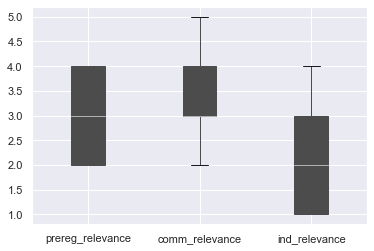

In [54]:
#boxplot of relevance rating of the chatbot for the 3 groups

df_rel = df.filter(items=['objectId', 'user_education', 'survey_q7a'])
survey_q7a_mymap = {'a': 5, 'b': 4, 'c': 3, 'd': 2, 'e': 1}
df_rel = df_rel.applymap(lambda s: survey_q7a_mymap.get(s) if s in survey_q7a_mymap else s)
df_prereg_corr['prereg_relevance'] = df_rel[df_rel['user_education'] == 'pre-registration training'][['survey_q7a']]
df_comm_corr['comm_relevance'] = df_rel[df_rel['user_education'] == 'PECT (community rotation)'][['survey_q7a']]
df_ind_corr['ind_relevance'] = df_rel[df_rel['user_education'] == 'PECT (industry rotation)'][['survey_q7a']]

boxplot_df = pd.concat([df_prereg_corr['prereg_relevance'], df_comm_corr['comm_relevance'], df_ind_corr['ind_relevance']], axis=1)
boxplot = boxplot_df.boxplot(patch_artist=True)
boxplot

boxplot_df.describe()

In [55]:
#Kruskal-Wallis test between the relevance ratings of the chatbot of the 3 groups

stats.kruskal(df_prereg_corr['prereg_relevance'], df_comm_corr['comm_relevance'], df_ind_corr['ind_relevance'])

#conclusion: statistically significant difference in relevance rating of the chatbot between the 3 groups

KruskalResult(statistic=14.071413644342162, pvalue=0.0008798960150665867)

In [56]:
#pairwise analysis (Mann-Whitney U test) between the relevance ratings of the chatbot

#between the PECT (industry) and PECT (community) groups
stats.mannwhitneyu(df_ind_corr['ind_relevance'], df_comm_corr['comm_relevance'], use_continuity=True, alternative='two-sided')

#between the pre-registration training and PECT (industry) groups
stats.mannwhitneyu(df_prereg_corr['prereg_relevance'], df_ind_corr['ind_relevance'], use_continuity=True, alternative='two-sided')

#between the pre-registration training and PECT (community) groups
stats.mannwhitneyu(df_prereg_corr['prereg_relevance'], df_comm_corr['comm_relevance'], use_continuity=True, alternative='two-sided')

#conclusion: statistically significant difference in relevance ratings of the chatbot between the PECT (industry) and PECT (community) groups, and between the pre-registration training and PECT (industry) groups

MannwhitneyuResult(statistic=141.0, pvalue=0.0010458791028786407)

MannwhitneyuResult(statistic=586.0, pvalue=0.001032127396160797)

MannwhitneyuResult(statistic=419.5, pvalue=0.7281104999622284)

In [57]:
#create a seperate dataframe for analysis of pre- and post-learning test scores in the respective aspects (IDENTIFICATION and MANAGEMENT) of the factors affecting long-term BPV

df_prereg_corr_3 = df[df['user_education'] == 'pre-registration training'][['identification_diff_test', 'management_diff_test', 'identification_post_test', 'identification_pre_test', 'management_post_test', 'management_pre_test']]
df_comm_corr_3 = df[df['user_education'] == 'PECT (community rotation)'][['identification_diff_test', 'management_diff_test', 'identification_post_test', 'identification_pre_test', 'management_post_test', 'management_pre_test']]
df_ind_corr_3 = df[df['user_education'] == 'PECT (industry rotation)'][['identification_diff_test', 'management_diff_test', 'identification_post_test', 'identification_pre_test', 'management_post_test', 'management_pre_test']]

df_prereg_corr_3.describe()
df_comm_corr_3.describe()
df_ind_corr_3.describe()

,identification_diff_test,management_diff_test,identification_post_test,identification_pre_test,management_post_test,management_pre_test
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.338235,0.161765,1.661765,1.323529,1.715686,1.553922
std,0.455947,0.417394,0.264274,0.430216,0.297377,0.332627
min,-0.833333,-0.666667,1.166667,0.666667,1.000000,0.833333
25%,0.041667,0.000000,1.500000,1.000000,1.416667,1.500000
50%,0.333333,0.166667,1.666667,1.333333,1.666667,1.666667
75%,0.666667,0.458333,2.000000,1.666667,2.000000,1.666667
max,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000


,identification_diff_test,management_diff_test,identification_post_test,identification_pre_test,management_post_test,management_pre_test
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.429487,0.294872,1.621795,1.192308,1.628205,1.333333
std,0.429918,0.445490,0.360733,0.342190,0.287934,0.312694
min,-0.500000,-1.000000,0.666667,0.666667,1.000000,0.833333
25%,0.333333,0.041667,1.375000,1.000000,1.333333,1.166667
50%,0.416667,0.333333,1.666667,1.333333,1.666667,1.166667
75%,0.666667,0.500000,2.000000,1.333333,1.916667,1.500000
max,1.333333,0.833333,2.000000,1.666667,2.000000,2.000000


,identification_diff_test,management_diff_test,identification_post_test,identification_pre_test,management_post_test,management_pre_test
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.420290,0.282609,1.608696,1.188406,1.623188,1.340580
std,0.514609,0.370758,0.320230,0.281161,0.231472,0.281941
min,-0.833333,-0.333333,0.833333,0.666667,1.333333,0.833333
25%,0.166667,0.000000,1.500000,1.000000,1.333333,1.166667
50%,0.333333,0.166667,1.666667,1.333333,1.666667,1.333333
75%,0.833333,0.500000,1.833333,1.333333,1.666667,1.583333
max,1.333333,1.166667,2.000000,1.666667,2.000000,1.666667


In [58]:
#Wilcoxon signed-rank test between the pre- and post-learning test scores on the IDENTIFICATION of the factors affecting long-term BPV for the 3 groups

stats.wilcoxon(df_prereg_corr_3['identification_post_test'], df_prereg_corr_3['identification_pre_test'], alternative='greater')
stats.wilcoxon(df_comm_corr_3['identification_post_test'], df_comm_corr_3['identification_pre_test'], alternative='greater')
stats.wilcoxon(df_ind_corr_3['identification_post_test'], df_ind_corr_3['identification_pre_test'], alternative='greater')

#conclusion: statistically significant test score improvement for all 3 groups

WilcoxonResult(statistic=448.5, pvalue=0.0002732790568179283)

WilcoxonResult(statistic=275.0, pvalue=0.00017129942829387183)

/home/jianyang/my_project_dir/my_env/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=228.0, pvalue=0.00046517311518495694)

In [59]:
#Kruskal-Wallis test between the score differentials (in IDENTIFICATION of the factors affecting long-term BPV) of the 3 groups

stats.kruskal(df_prereg_corr_3['identification_diff_test'], df_comm_corr_3['identification_diff_test'], df_ind_corr_3['identification_diff_test'])

#conclusion: no statistically signficant difference in score differential between the 3 groups

KruskalResult(statistic=0.4425441630279985, pvalue=0.801498577674214)

In [60]:
#Wilcoxon signed-rank test between the pre- and post-learning test scores on the MANAGEMENT of the factors affecting long-term BPV for the 3 groups

stats.wilcoxon(df_prereg_corr_3['management_post_test'], df_prereg_corr_3['management_pre_test'], alternative='greater')
stats.wilcoxon(df_comm_corr_3['management_post_test'], df_comm_corr_3['management_pre_test'], alternative='greater')
stats.wilcoxon(df_ind_corr_3['management_post_test'], df_ind_corr_3['management_pre_test'], alternative='greater')

#conclusion: statistically significant test score improvement for all 3 groups

WilcoxonResult(statistic=258.0, pvalue=0.01780482996649086)

WilcoxonResult(statistic=249.5, pvalue=0.002149040734569897)

WilcoxonResult(statistic=168.0, pvalue=0.00160156242704644)

In [61]:
#Kruskal-Wallis test between the score differentials (in MANAGEMENT of the factors affecting long-term BPV) of the 3 groups

stats.kruskal(df_prereg_corr_3['management_diff_test'], df_comm_corr_3['management_diff_test'], df_ind_corr_3['management_diff_test'])

#conclusion: no statistically signficant difference in score differential between the 3 groups

KruskalResult(statistic=2.3875830340637294, pvalue=0.30306998788335887)

In [62]:
#convert 5-point likert scale in specific survey questions into binary scale (i.e. Good, Not Good)

df_crosstab = df.filter(items=['objectId', 'user_education', 'survey_q4a', 'survey_q4b', 'survey_q5a', 'survey_q5b'])
survey_mymap = {'a': 'Good', 'b': 'Good', 'c': 'Good', 'd': 'Not Good', 'e': 'Not Good'}
df_crosstab = df_crosstab.applymap(lambda s: survey_mymap.get(s) if s in survey_mymap else s)
df_prereg_crosstab = df_crosstab[df_crosstab['user_education'] == 'pre-registration training']
df_comm_crosstab = df_crosstab[df_crosstab['user_education'] == 'PECT (community rotation)']
df_ind_crosstab = df_crosstab[df_crosstab['user_education'] == 'PECT (industry rotation)']

In [63]:
#survey q4a/b: What best describes your level of knowledge on identifying the factors affecting long-term BPV
#BEFORE/AFTER using the chatbot?

#in number of users

prereg_crosstab_IDE = pd.crosstab(df_prereg_crosstab['survey_q4a'], df_prereg_crosstab['survey_q4b'], margins = False) 
prereg_crosstab_IDE
comm_crosstab_IDE = pd.crosstab(df_comm_crosstab['survey_q4a'], df_comm_crosstab['survey_q4b'], margins = False) 
comm_crosstab_IDE
ind_crosstab_IDE = pd.crosstab(df_ind_crosstab['survey_q4a'], df_ind_crosstab['survey_q4b'], margins = False) 
ind_crosstab_IDE

survey_q4b,Good,Not Good
survey_q4a,,
Good,19,0
Not Good,13,2


survey_q4b,Good
survey_q4a,
Good,18
Not Good,8


survey_q4b,Good
survey_q4a,
Good,11
Not Good,12


In [64]:
#survey q5a/b: What best describes your level of knowledge on managing the factors affecting long-term BPV, 
#BEFORE/AFTER using the chatbot?

#in number of users

prereg_crosstab_MAN = pd.crosstab(df_prereg_crosstab['survey_q5a'], df_prereg_crosstab['survey_q5b'], margins = False) 
prereg_crosstab_MAN
comm_crosstab_MAN = pd.crosstab(df_comm_crosstab['survey_q5a'], df_comm_crosstab['survey_q5b'], margins = False) 
comm_crosstab_MAN
ind_crosstab_MAN = pd.crosstab(df_ind_crosstab['survey_q5a'], df_ind_crosstab['survey_q5b'], margins = False) 
ind_crosstab_MAN

survey_q5b,Good
survey_q5a,
Good,21
Not Good,13


survey_q5b,Good
survey_q5a,
Good,19
Not Good,7


survey_q5b,Good
survey_q5a,
Good,12
Not Good,11


In [65]:
#McNemar's test on the change in perceived knowledge on the IDENTIFICATION of the factors affecting long-term BPV after using the chatbot

print(mcnemar(prereg_crosstab_IDE, exact=True, correction=True))
print(mcnemar(comm_crosstab_IDE, exact=True, correction=True))
print(mcnemar(ind_crosstab_IDE, exact=True, correction=True))

#conclusion: statistically significant change in perceived knowledge for all 3 groups

pvalue      0.000244140625
statistic   0.0
pvalue      0.0078125
statistic   0.0
pvalue      0.00048828125
statistic   0.0


In [66]:
#McNemar's test on the change in perceived knowledge on the MANAGEMENT of the factors affecting long-term BPV after using the chatbot

print(mcnemar(prereg_crosstab_MAN, exact=True, correction=True))
print(mcnemar(comm_crosstab_MAN, exact=True, correction=True))
print(mcnemar(ind_crosstab_MAN, exact=True, correction=True))

#conclusion: statistically significant change in perceived knowledge for all 3 groups

pvalue      0.000244140625
statistic   0.0
pvalue      0.015625
statistic   0.0
pvalue      0.0009765625
statistic   0.0


In [67]:
#in-depth analysis into users from the pre-registration training group whose test scores deteriorated after using the chatbot

prereg_list = df_pre_reg.index[df_pre_reg['prereg_score_diff'] < 0].tolist()
filter_df  = df[df.index.isin(prereg_list)]
prereg_diff = filter_df[['identification_diff_test', 'management_diff_test', 'identification_post_test', 'identification_pre_test', 'management_post_test', 'management_pre_test']]
prereg_diff

,identification_diff_test,management_diff_test,identification_post_test,identification_pre_test,management_post_test,management_pre_test
4,-0.500000,0.166667,1.500000,2.000000,1.666667,1.5
17,-0.333333,-0.333333,1.666667,2.000000,1.666667,2.0
35,0.333333,-0.500000,2.000000,1.666667,1.000000,1.5
36,0.333333,-0.666667,1.666667,1.333333,1.333333,2.0
57,-0.333333,-0.333333,1.666667,2.000000,1.666667,2.0
70,-0.833333,0.000000,1.166667,2.000000,2.000000,2.0


In [68]:
#in-depth analysis into users from the PECT (community) group whose test scores deteriorated after using the chatbot

comm_list = df_comm.index[df_comm['comm_score_diff'] < 0].tolist()
comm_filter_df  = df[df.index.isin(comm_list)]
comm_diff = comm_filter_df[['identification_diff_test', 'management_diff_test', 'identification_post_test', 'identification_pre_test', 'management_post_test', 'management_pre_test']]
comm_diff

,identification_diff_test,management_diff_test,identification_post_test,identification_pre_test,management_post_test,management_pre_test
16,-0.500000,-0.166667,1.166667,1.666667,1.333333,1.500000
23,0.000000,0.500000,0.666667,0.666667,1.666667,1.166667
46,0.333333,-1.000000,1.666667,1.333333,1.000000,2.000000


In [69]:
#in-depth analysis into users from the PECT (industry) group whose test scores deteriorated after using the chatbot

ind_list = df_ind.index[df_ind['ind_score_diff'] < 0].tolist()
ind_filter_df  = df[df.index.isin(ind_list)]
ind_diff = ind_filter_df[['identification_diff_test', 'management_diff_test', 'identification_post_test', 'identification_pre_test', 'management_post_test', 'management_pre_test']]
ind_diff

,identification_diff_test,management_diff_test,identification_post_test,identification_pre_test,management_post_test,management_pre_test
21,-0.166667,0.000000,1.166667,1.333333,1.666667,1.666667
39,-0.166667,-0.166667,1.166667,1.333333,1.333333,1.500000
42,-0.833333,0.166667,0.833333,1.666667,1.666667,1.500000
71,-0.166667,-0.166667,1.166667,1.333333,1.333333,1.500000
